Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
df_data=pd.read_csv("/content/employee_promotion.csv")
df_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [ ]:
df=df_data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.000,NaN,NaN,NaN,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.000,NaN,NaN,NaN,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,NaN,NaN,NaN,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,NaN,NaN,NaN,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,NaN,NaN,NaN,5.866,4.265,1.000,3.000,5.000,7.000,37.000


In [ ]:
df.shape

(54808, 13)

In [ ]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

* There are no duplicate values in the columns

In [ ]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.520
length_of_service      0.000
awards_won             0.000
avg_training_score     4.670
is_promoted            0.000
dtype: float64

education, avg_training_score and previous_year_rating have missing values

In [ ]:
df["is_promoted"].value_counts(1)

is_promoted
0   0.915
1   0.085
Name: proportion, dtype: float64

* It is an imbalanced dataset with around 80% of the customers have not exited and around 20% exited the bank

## Exploratory Data Analysis (EDA)

In [ ]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [ ]:
feature_tm=df.describe(include=["object"]).columns.tolist()+df.select_dtypes(include=["int64"]).columns.tolist()
feature_del=["no_of_trainings","age","length_of_service","awards_won"]
feature_cat=[i for i in feature_tm if i not in feature_del]
feature_tm=df.select_dtypes(include=np.number).columns.tolist()
feature_num=[i for i in feature_tm if i not in feature_cat]
feature_cat,feature_num

(['department',
  'region',
  'education',
  'gender',
  'recruitment_channel',
  'employee_id',
  'is_promoted'],
 ['no_of_trainings',
  'age',
  'previous_year_rating',
  'length_of_service',
  'awards_won',
  'avg_training_score'])

- Segregating into numerical and categorical columns

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
def histogram_boxplot(data, feature,title, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # print(title)
    # plt.title(title)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    ).set_title(title)  # boxplot will be created and a triangle will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def box_hist_plot(idx):
    histogram_boxplot(df, feature_num[idx],title=f'Box and hist plot for {feature_num[idx]}')

In [ ]:
def plot_each_feature_num(idx_num):
    if idx_num<len(feature_num):
        histogram_boxplot(df, feature_num[idx_num],title=f'Box and hist plot for {feature_num[idx_num]}')
    else:
        print('Finished plotting numerical features')

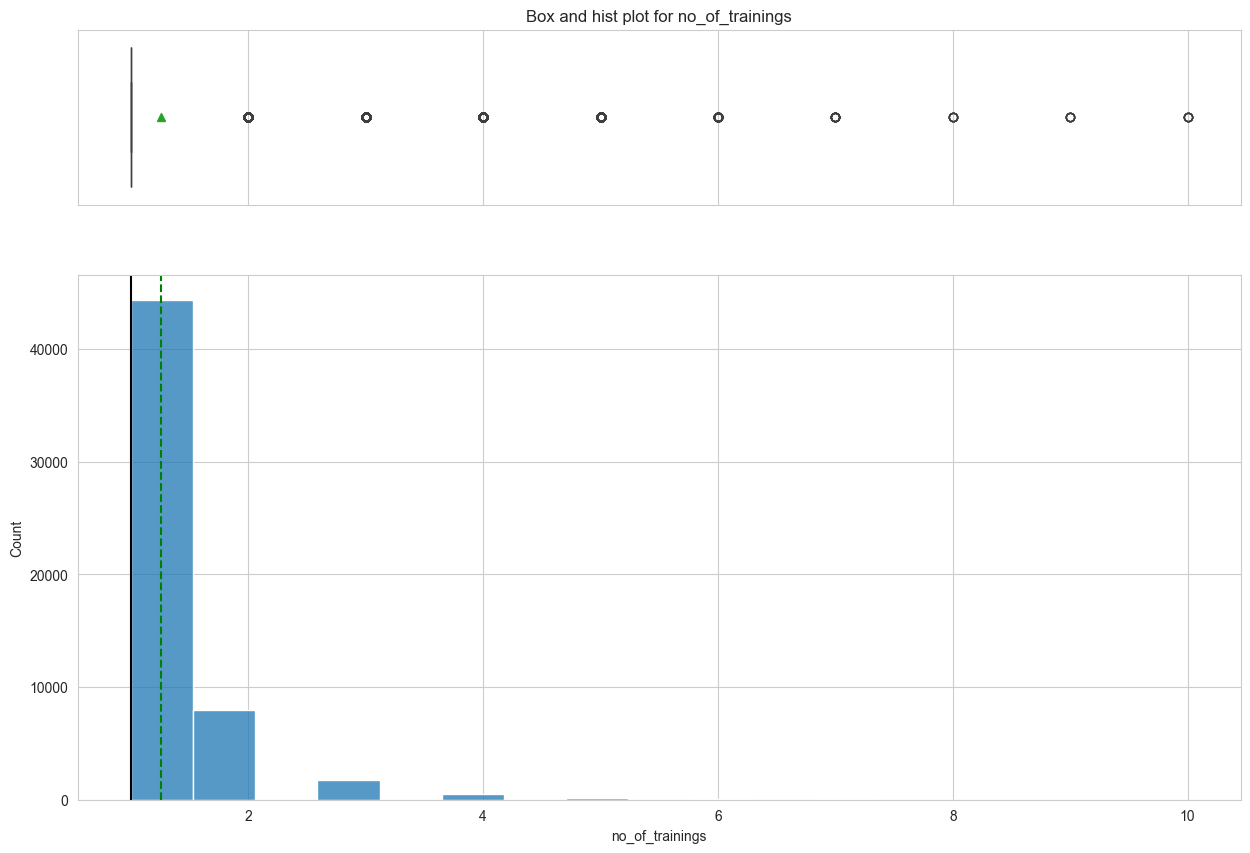

In [ ]:
i=0
plot_each_feature_num(i)

Around 80% of the employees completed 1 training, 14% completed 2 trainings, only 5 people completed more than 7 trainings

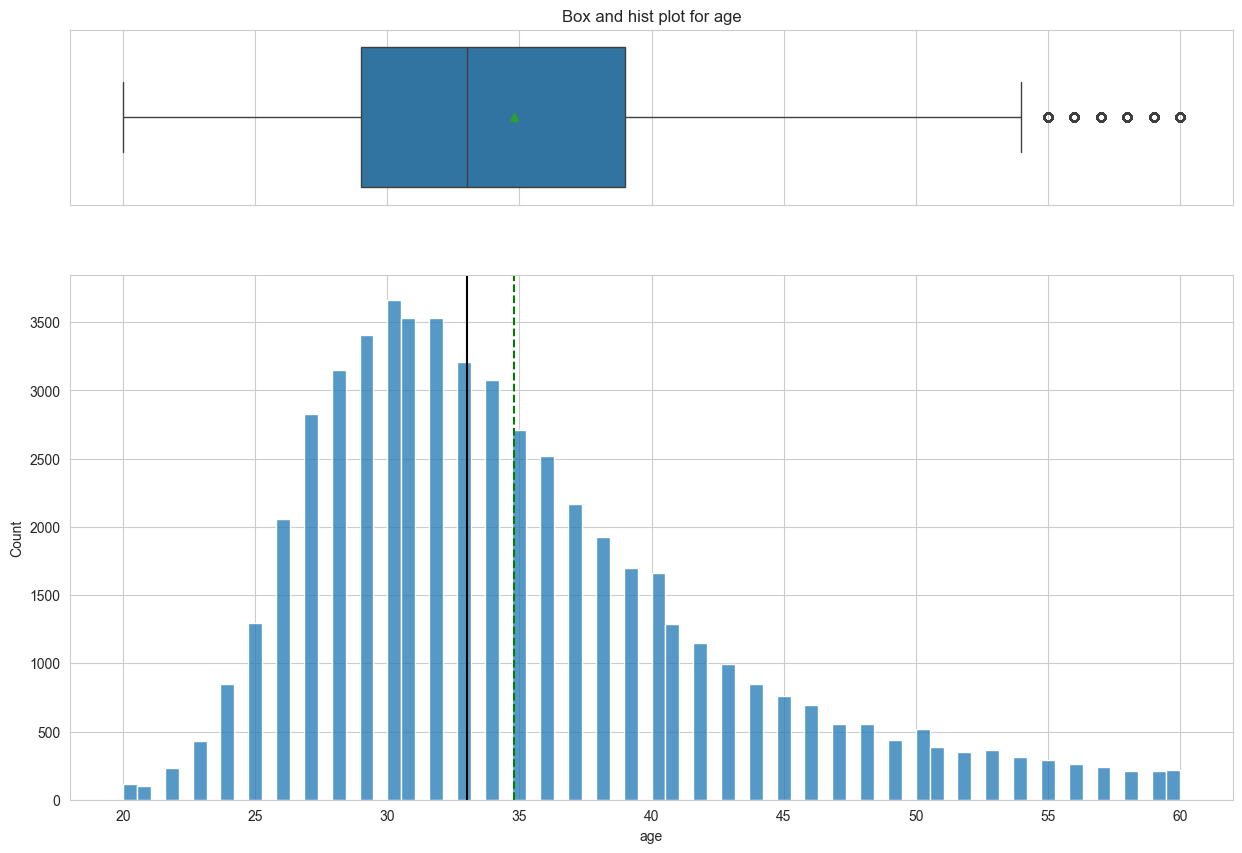

In [ ]:
i=1
plot_each_feature_num(i)

Average age of employees is 35
The age distribution is right skewed

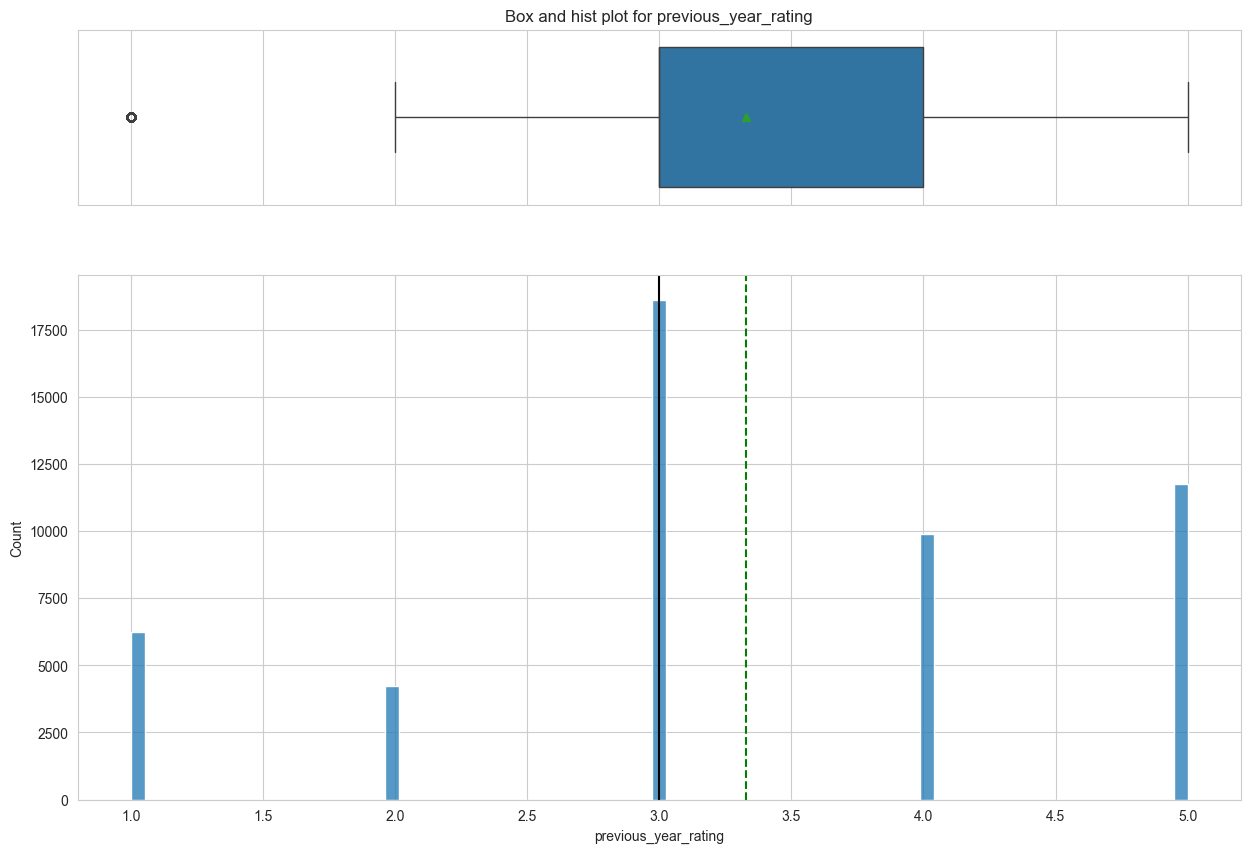

In [ ]:
i=2
plot_each_feature_num(i)

Average previous_year_rating is 3.3 and median is 3

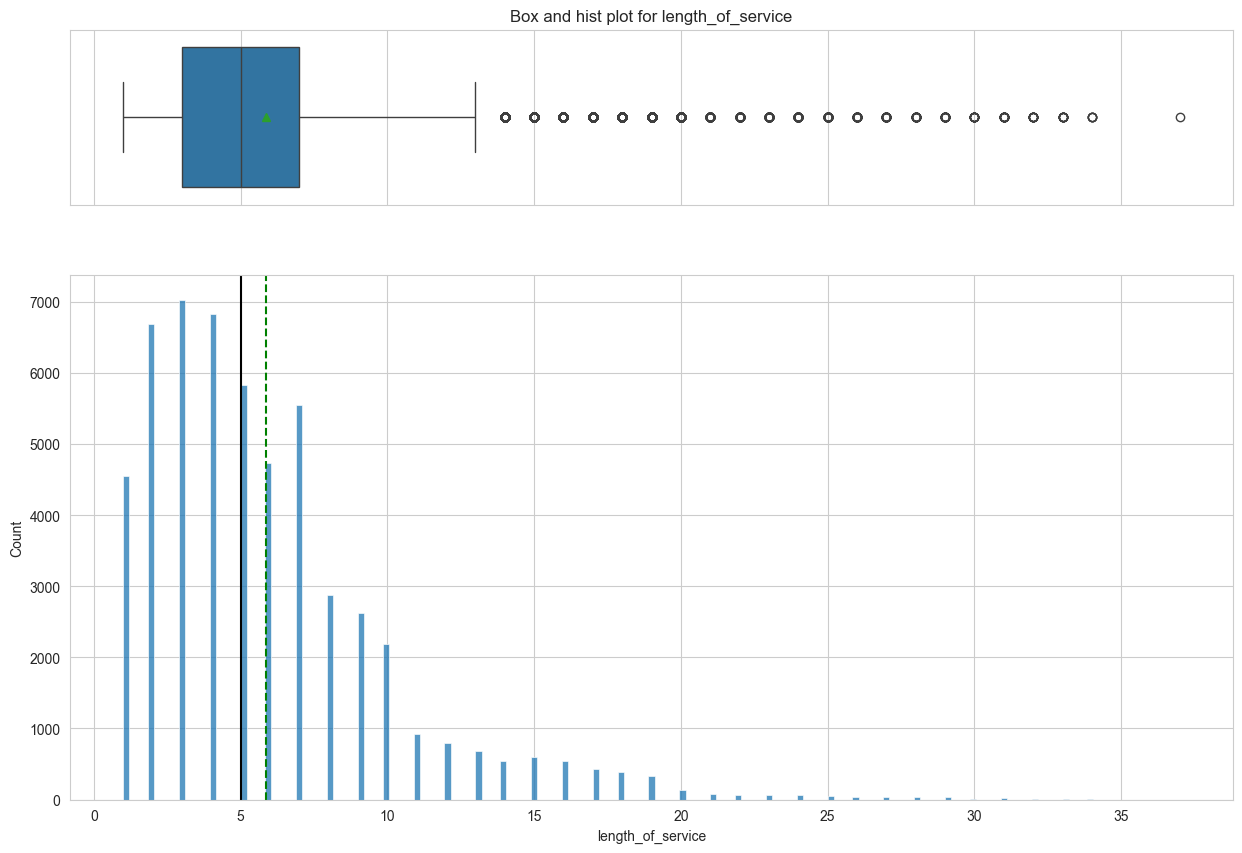

In [ ]:
i=3
plot_each_feature_num(i)

Average length_of_service is 6 and median is 5
The distribution is right skewed

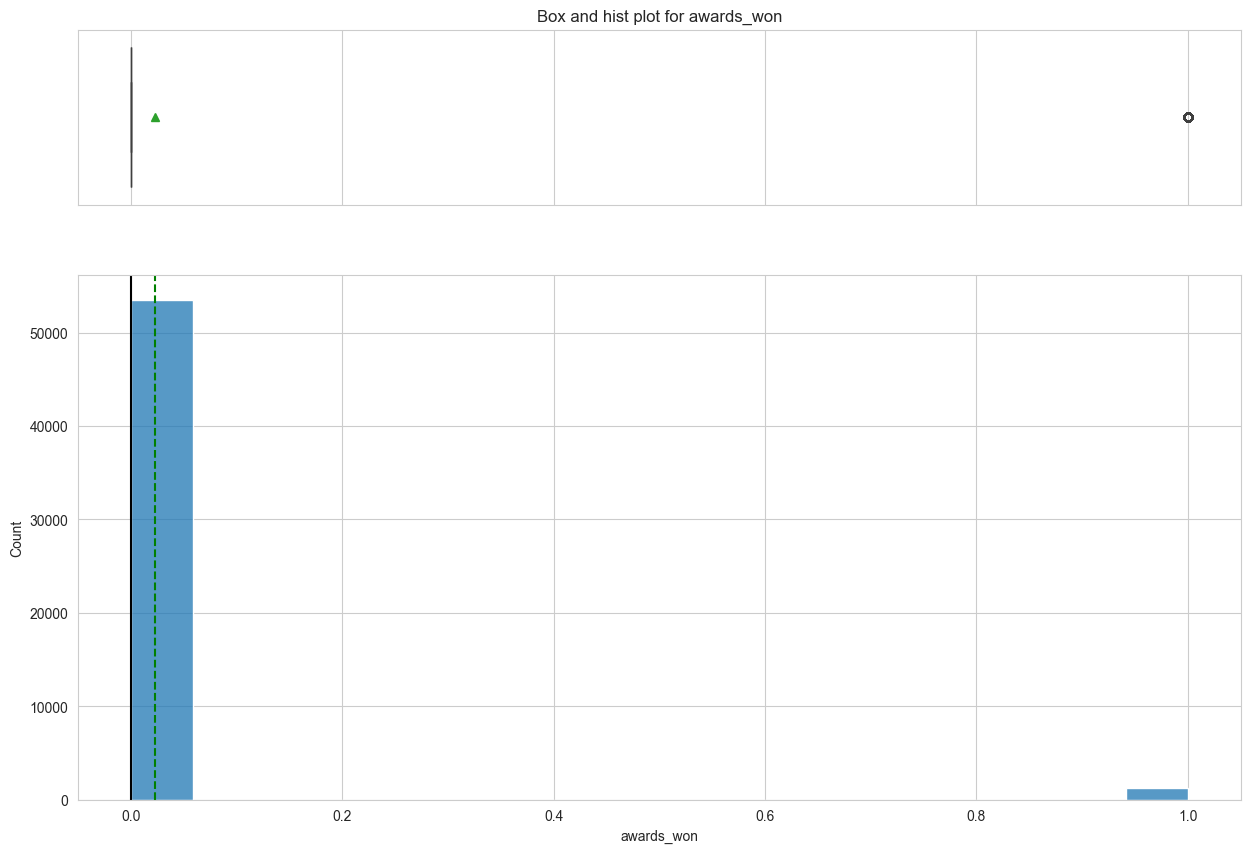

In [ ]:
i=4
plot_each_feature_num(i)

In [ ]:
df['awards_won'].value_counts(1)

awards_won
0   0.977
1   0.023
Name: proportion, dtype: float64

Around 97% didn't win awards

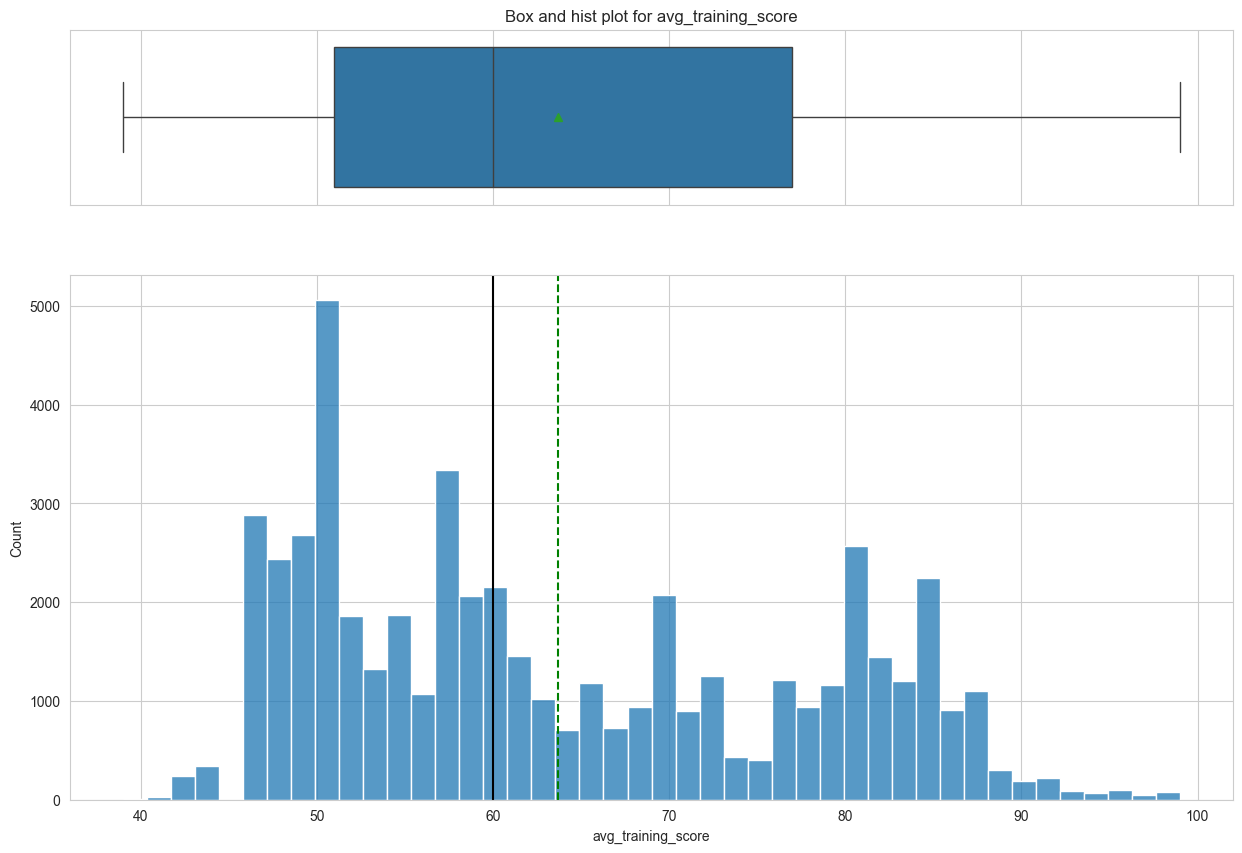

In [ ]:
i=5
plot_each_feature_num(i)

Average avg_training_score is around 63 and median is around 60
The distribution is multimodal with the highest peak around 50, next around 58

In [ ]:
def plot_each_feature_cat(i):
    if i<len(feature_cat):
        if feature_cat[i] not in ['employee_id']:
            labeled_barplot(df, feature_cat[i], perc=True)
        else:
            print('Increment the index')
    else:
        print('Finished plotting categorical features')


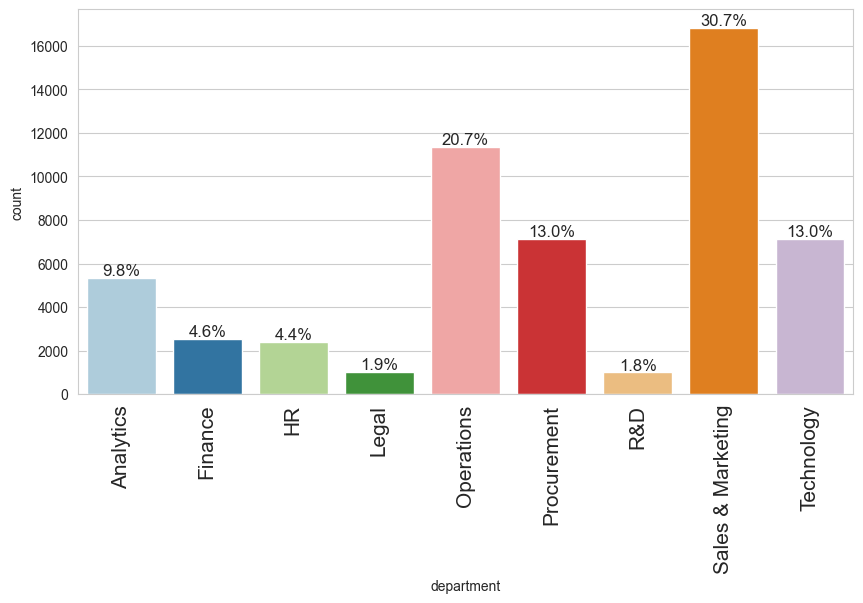

In [ ]:
feat_cat_ind=0
plot_each_feature_cat(feat_cat_ind)

Sales & Marketing has the highest percentage of employees around 30, followed by Operations. Legal and R&D have less than 2%

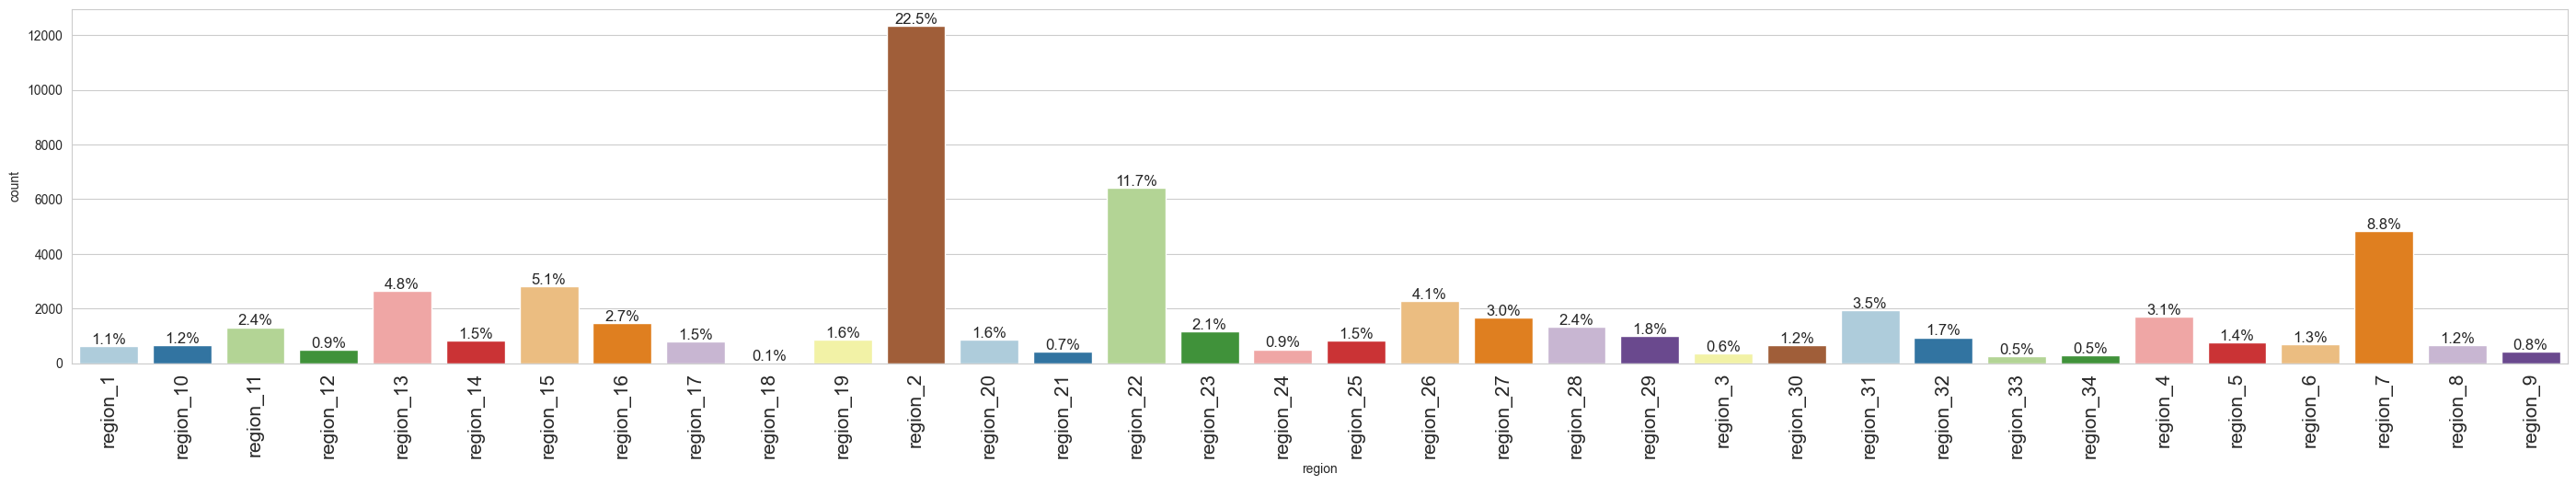

In [ ]:
feat_cat_ind=1
plot_each_feature_cat(feat_cat_ind)

Region 2 has the highest percentage of employees around 22, followed by region 22 with 11. Region 18 has the lowest around 0.1%

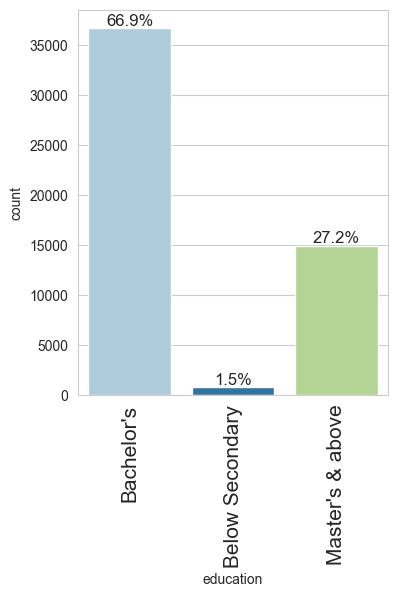

In [ ]:
feat_cat_ind=2
plot_each_feature_cat(feat_cat_ind)

Employees with education "Bachelor's" is the highest percentage around 70, followed by "Master's" & above with 28%, followed by "Below Secondary" with 1.5%

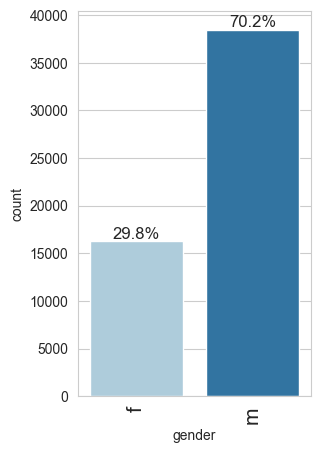

In [ ]:
feat_cat_ind=3
plot_each_feature_cat(feat_cat_ind)

Number of male employees are highest around 70% compared to females around 29%

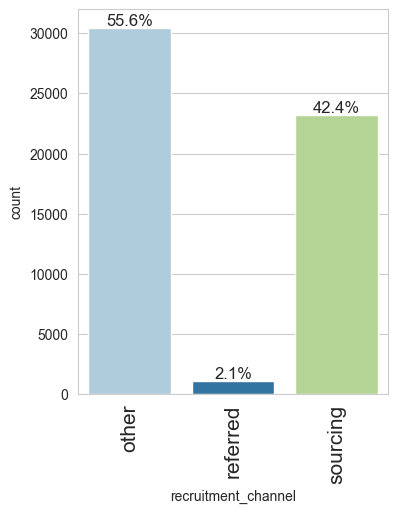

In [ ]:
feat_cat_ind=4
plot_each_feature_cat(feat_cat_ind)

Employees with recruitment channel "other" are highest around 55%, sourcing around 42%, lowest is referred around 2%

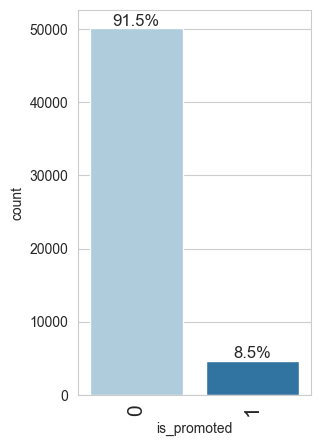

In [ ]:
feat_cat_ind=6
plot_each_feature_cat(feat_cat_ind)

Employees not promoted are highest around 91.5%, promoted are 8.5%
It is a highly imbalanced dataset

### Bivariate Analysis

In [ ]:
def plot_bivariate(i):
    if i<len(feature_num):
        distribution_plot_wrt_target(df, feature_num[i], "is_promoted")
    else:
        print('Finished plotting bivariate')

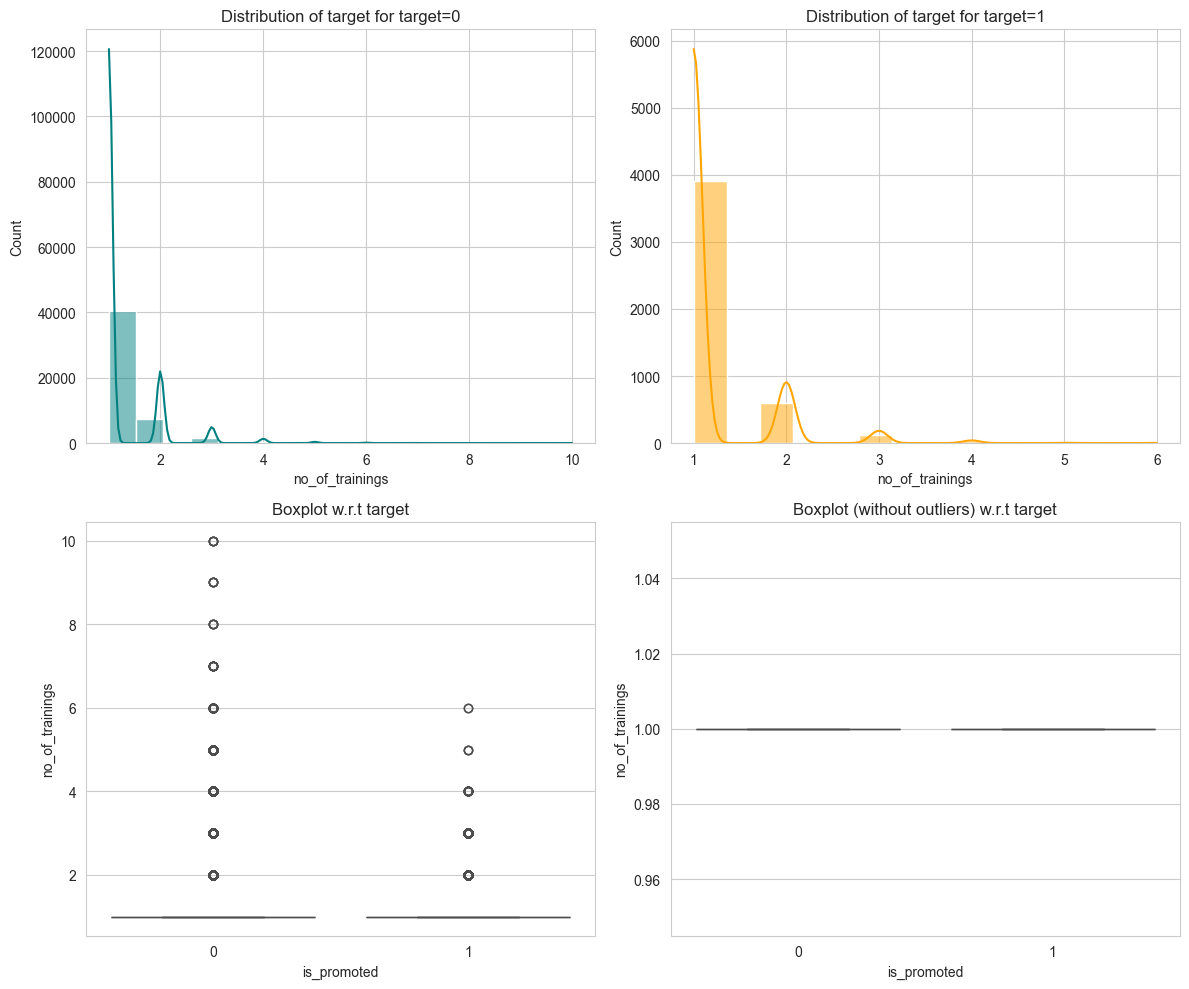

In [ ]:
bivariate_ind=-1
bivariate_ind+=1
plot_bivariate(bivariate_ind)

There are 4k employees who completed 1 training and are promoted, around 500 who completed 2 trainings and are promoted. While there are also the ones who completed 1-10 trainings but were not promoted(40k who completed training 1 but not promoted)

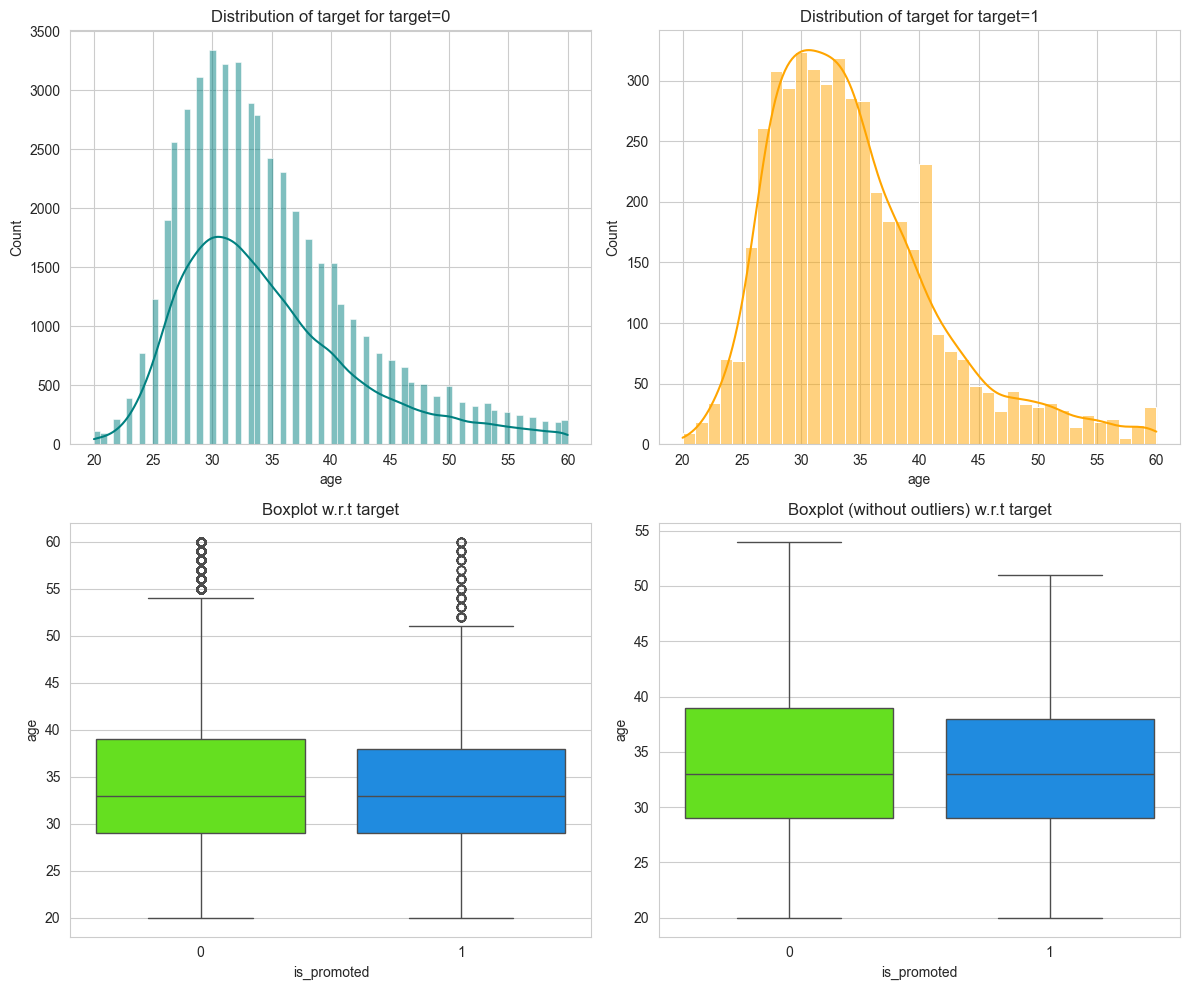

In [ ]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

The distribution of age of employees is right skewed in both the cases of those who are promoted and those who are not
the median age is around 32.5 for those who are promoted. It is around the same for those not promoted as well

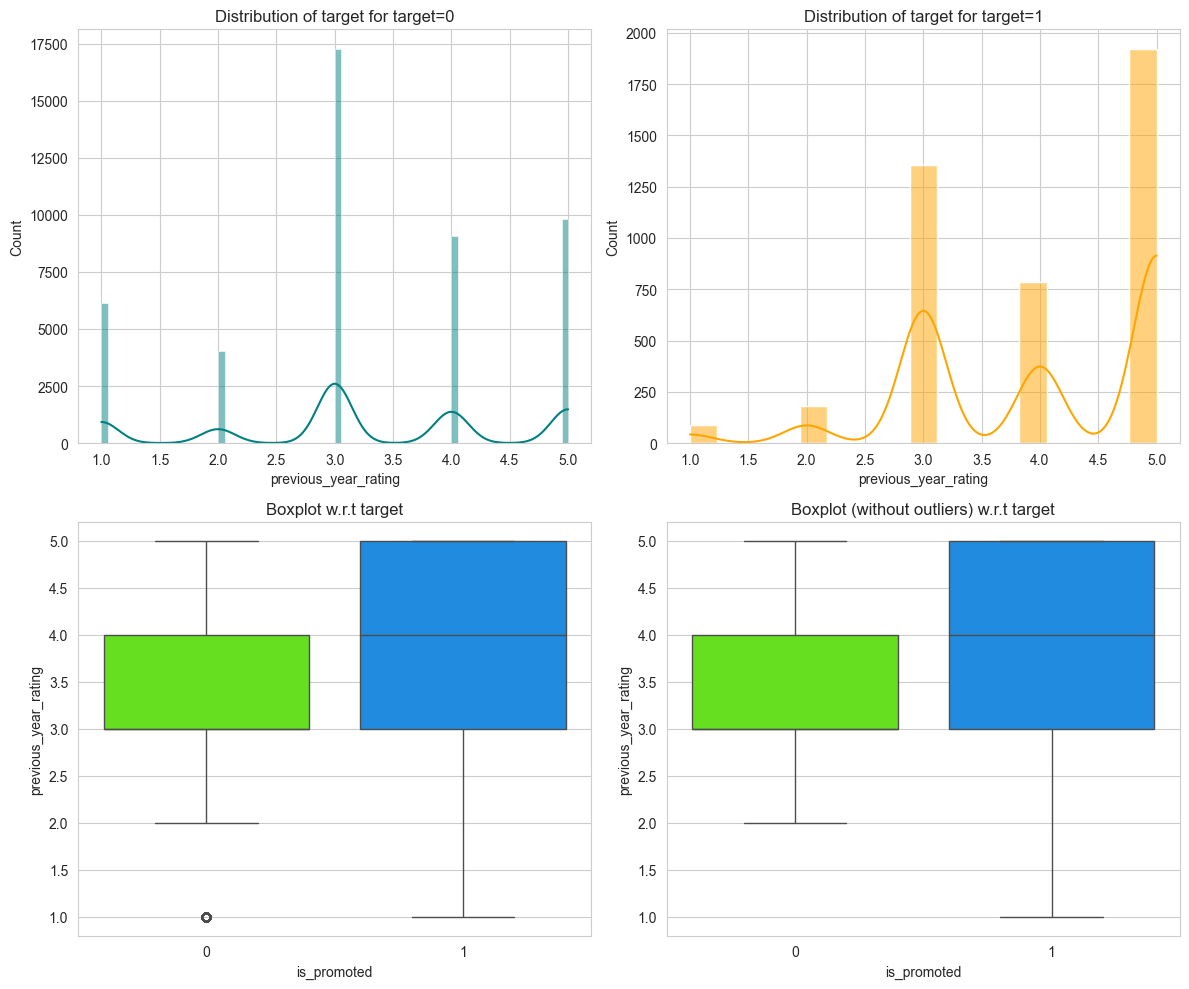

In [ ]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

The distribution of previous_year_rating of promoted employees is multimodal with peak around 5, 3 and 4.
The distribution of previous_year_rating of not promoted employees is multimodal with peak 3, small peak around 4 and 5
The median previous_year_rating is around 4 in promoted employees

Around 44% of the promoted employees have 5 as previous year rating

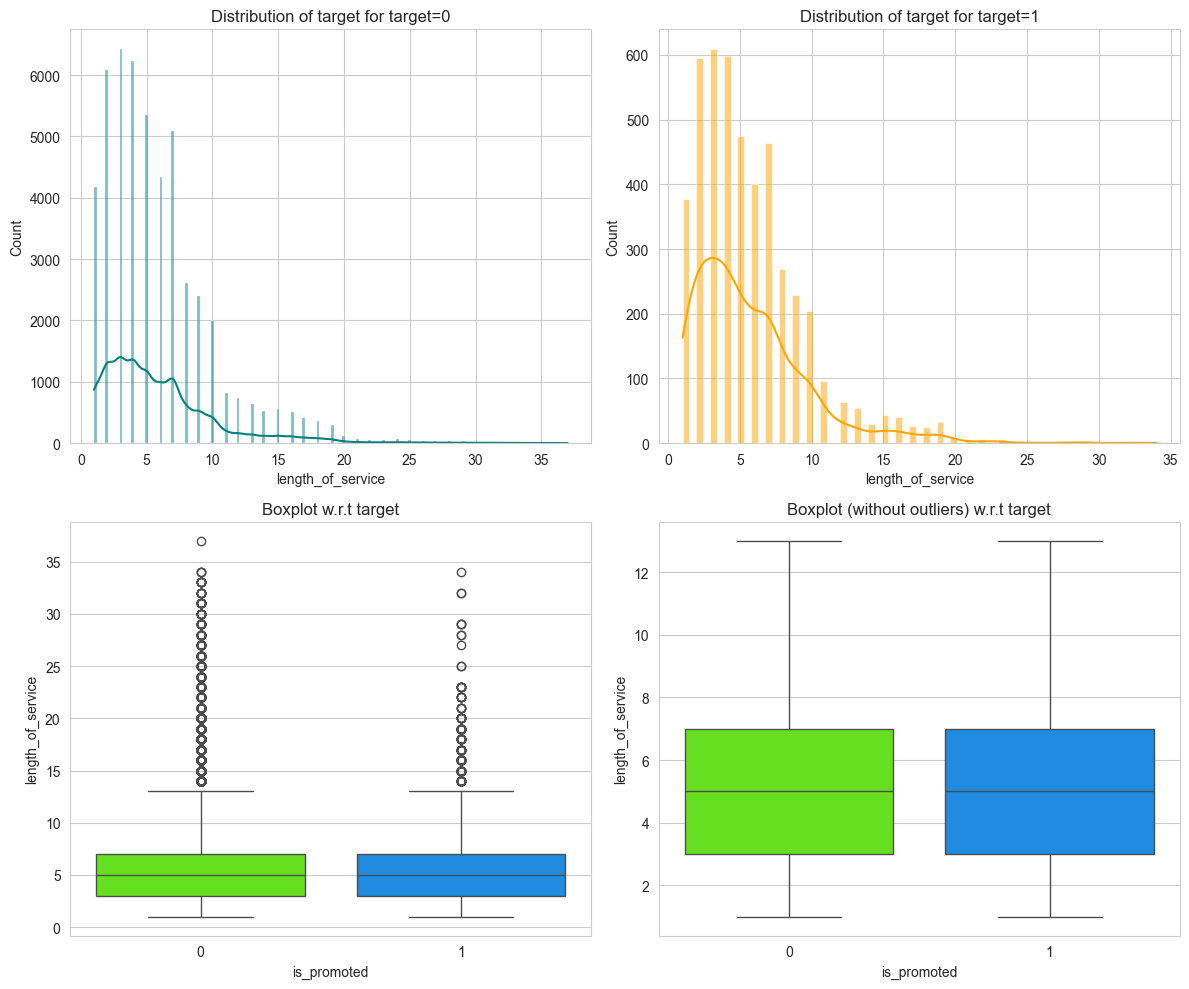

In [ ]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

The distribution of length_of_service of employees is right skewed in both the cases of those who are promoted and those who are not
The median length_of_service is around 5 in both promoted and not promoted employees. For promoted case the peak/mode is around 2.6

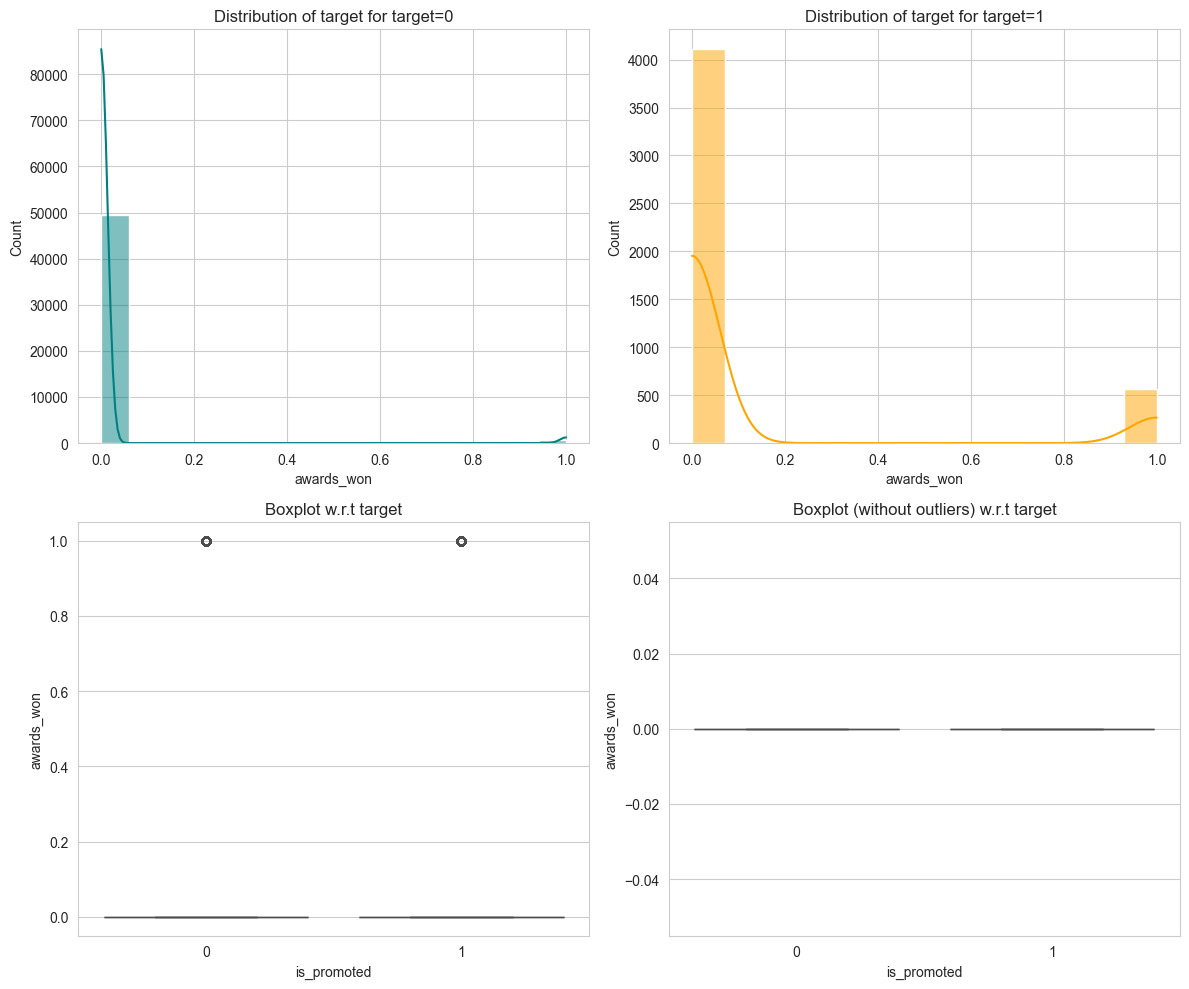

In [ ]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

The distribution of awards won of employees is highly right skewed in both the cases of those who are promoted and those who are not
There are around 4k employees who didnt win any awards and are promoted.
There are around 559 employees who won awards and are promoted vs 711 employees who won and are not promoted
Promoted employees and not promoted have a median of 0 for awards one

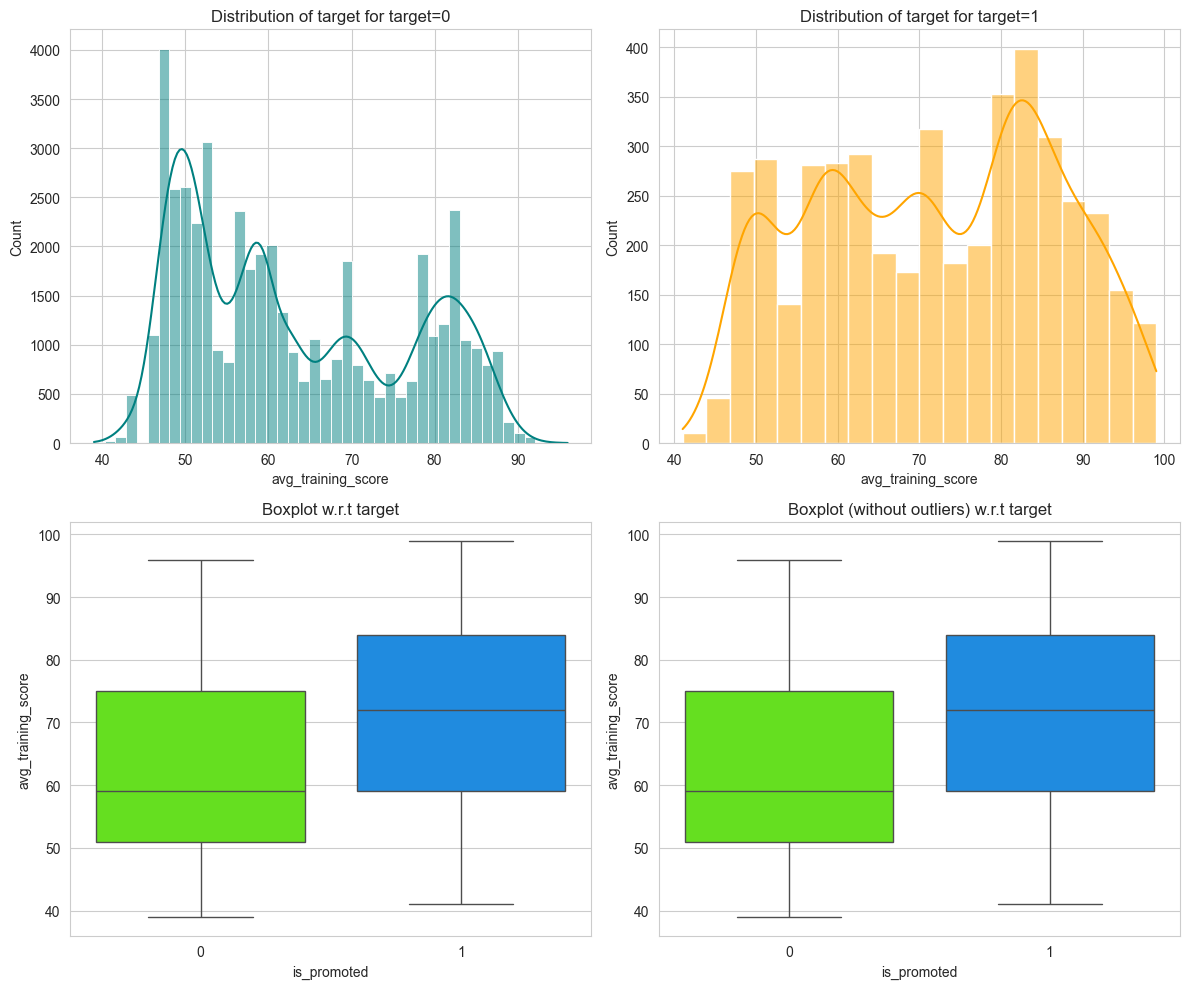

In [ ]:
bivariate_ind+=1
plot_bivariate(bivariate_ind)

The distribution of avg_training_score of employees is multimodal in both the cases promoted and not promoted
Promoted case, avg_training_score peaks around 85 highest, then around 60
Not promoted case, avg_training_score peaks around 50 highest, then around 60
the median avg_training_score is around 72 in promoted case and 59 in not promoted case

In [ ]:
def plot_each_stacked_bar(i):
    if i < len(feature_cat) and feature_cat[i]!="is_promoted" and feature_cat[i] not in ['employee_id']:
        stacked_barplot(df, feature_cat[i], "is_promoted")
    elif feature_cat[i]=="is_promoted":
        pass
    elif feature_cat[i] in ['employee_id']:
        print('Increment the index')
    else:
        print('Finished plotting stacked_bar')


is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


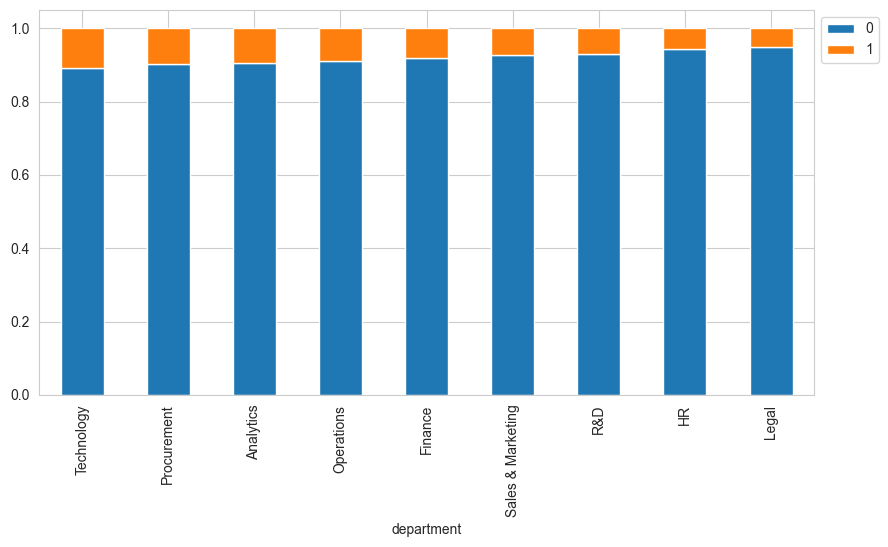

In [ ]:
stacked_bar_ind = 0
plot_each_stacked_bar(stacked_bar_ind)


Technology has the highest promoted to total employees ratio, followed by Procurement, Analytics, Operations, Finance, Sales & Marketing, R&D etc.. and Legal has the least

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

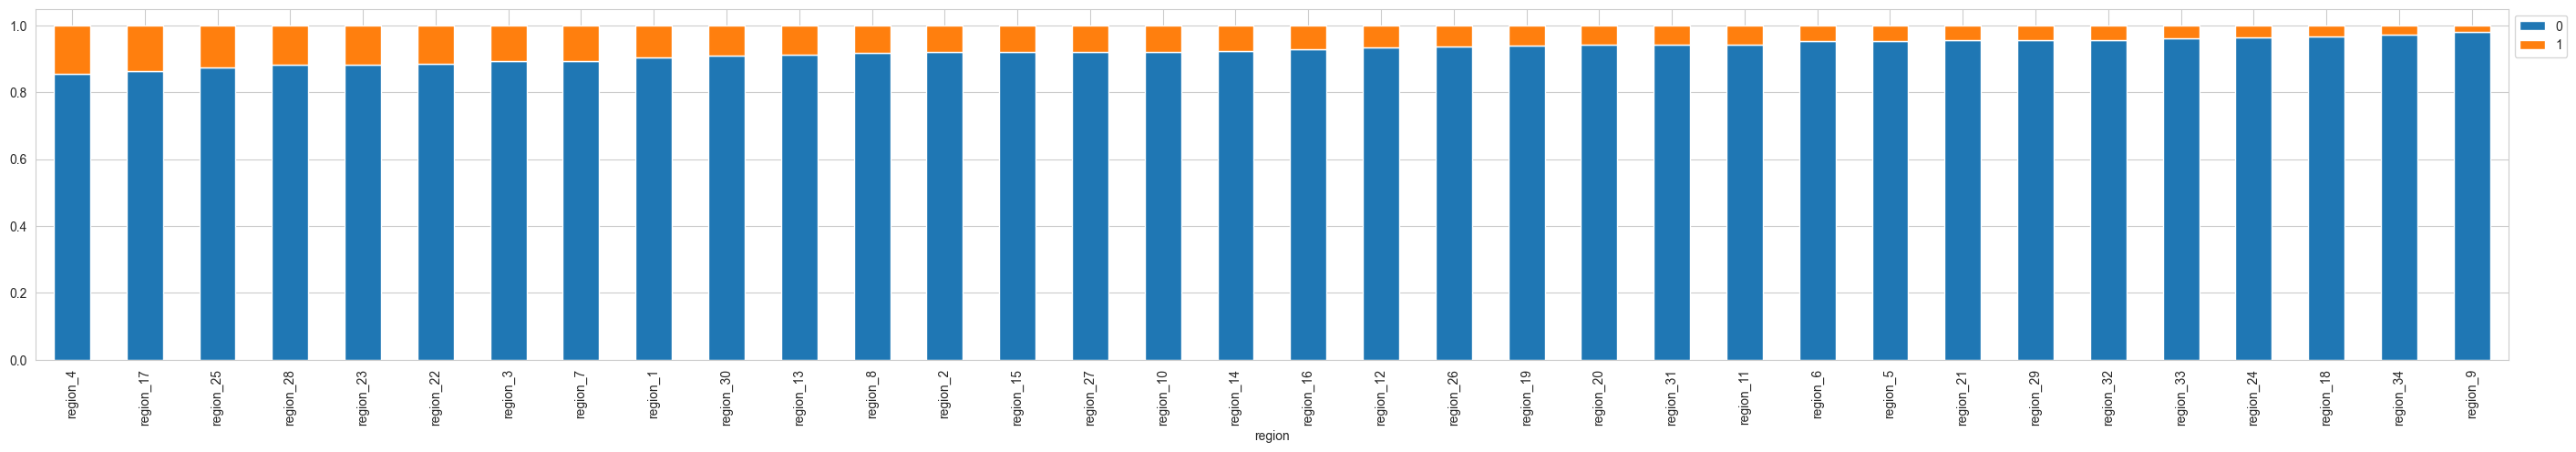

In [ ]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)


Region 4 has the highest promoted to total employees ratio, followed by region 17, 25 etc.. and 9 has the least

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


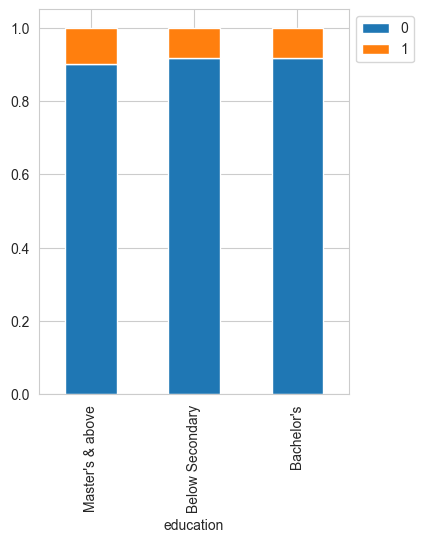

In [ ]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)


Master's & above has the highest promoted to total employees ratio, followed by Below Secondary

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


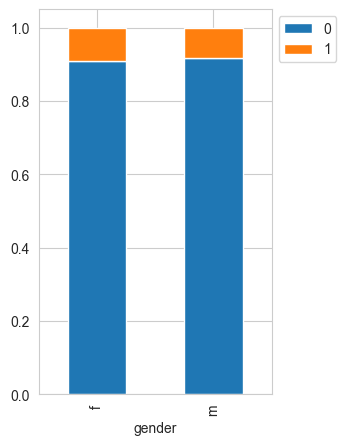

In [ ]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)


Both male and female have around the same ratio of promoted to total in their respective category

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


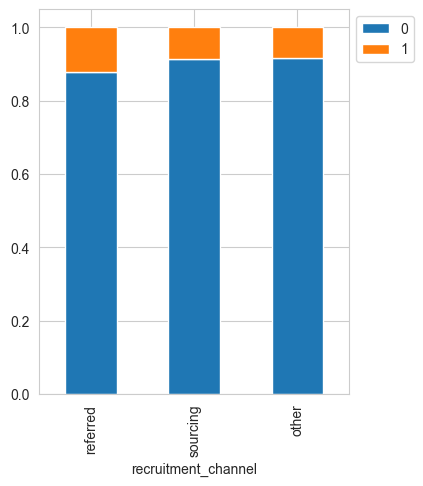

In [ ]:
stacked_bar_ind+=1
plot_each_stacked_bar(stacked_bar_ind)


Referred in recruitment channel has the highest ratio of promoted to total followed by sourcing then other

#### Determining correlation with the target attribute (is_promoted)

We could use Cramer's V to measure the strength of the association between two categorical variables
Interpretation:
 V=0: No association between the variables
 V close to 0: Weak association between the variables
 0.2<V<0.6: Moderate association between the variables
 V>0.6: Strong association between the variables
 V=1: Perfect association between the variables       

In [ ]:
import scipy.stats as ss

def cramers_v(cm):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(cm)[0]
    n = cm.sum()
    phi2 = chi2 / n
    r, k = cm.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [ ]:
for idx_cat in feature_cat:
    if idx_cat not in ['employee_id','is_promoted']:
        cm = pd.crosstab(df[idx_cat], df['is_promoted'])
        cramers_val=cramers_v(cm.values)
        print(f'The Cramers V for {idx_cat} and is_promoted is  {cramers_val}')

The Cramers V for department and is_promoted is  0.05115596067295646
The Cramers V for region and is_promoted is  0.08986842586887933
The Cramers V for education and is_promoted is  0.02573508816280678
The Cramers V for gender and is_promoted is  0.010177719350736693
The Cramers V for recruitment_channel and is_promoted is  0.017733889196142143


## Observations:
Using Cramer's V We found that there's almost no correlation between any of the categorical features and the target.

We'll use pointbiserial correlation coefficient for numerical features vs target binary feature, after imputing the required columns with NAN values

<Axes: >

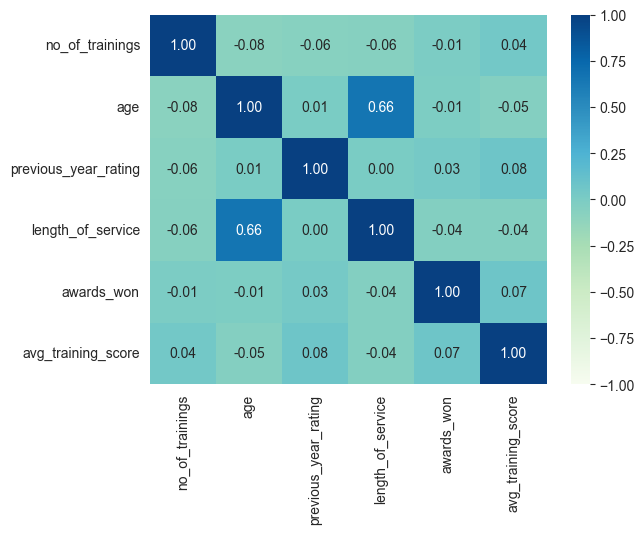

In [ ]:
sns.heatmap(df[feature_num].corr(), annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="GnBu")

## Observations:
There moderate correlation between length of service and age

## Data Pre-processing

In [ ]:
df['employee_id'].nunique()==df.shape[0]

True

* All the values in the employee id column are unique
* We can drop this column

In [ ]:
df_drop=df.drop(["employee_id"], axis=1)

In [ ]:
X = df_drop.drop(["is_promoted"], axis=1)
y = df_drop["is_promoted"]

In [ ]:
# Splitting data into training and validation set:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(43846, 11) (2741, 11) (8221, 11)


In [ ]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)

employee_id            0.000
department             0.000
region                 0.000
education              4.400
gender                 0.000
recruitment_channel    0.000
no_of_trainings        0.000
age                    0.000
previous_year_rating   7.520
length_of_service      0.000
awards_won             0.000
avg_training_score     4.670
is_promoted            0.000
dtype: float64

education, avg_training_score and previous_year_rating have missing values

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop='first',handle_unknown="ignore",))

num_pipeline = make_pipeline(SimpleImputer(strategy="constant",fill_value=0))

ct_prepr = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

X_train_processed = ct_prepr.fit_transform(X_train).toarray()
X_val_processed = ct_prepr.transform(X_val).toarray()
X_test_processed = ct_prepr.transform(X_test).toarray()

X_train_df=pd.DataFrame(
    X_train_processed,
    columns=ct_prepr.get_feature_names_out(),
    index=X_train.index
)

X_val_df=pd.DataFrame(
    X_val_processed,
    columns=ct_prepr.get_feature_names_out(),
    index=X_val.index
)

X_test_df=pd.DataFrame(
    X_test_processed,
    columns=ct_prepr.get_feature_names_out(),
    index=X_test.index
)

print(f'{X_train_df.shape=}')
print(f'{X_val_df.shape=}')
print(f'{X_test_df.shape=}')


X_train_df.shape=(43846, 52)
X_val_df.shape=(2741, 52)
X_test_df.shape=(8221, 52)


In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((43846, 11), (43846,), (2741, 11), (2741,), (8221, 11), (8221,))

In [ ]:
X_train_df.shape,X_val_df.shape,X_test_df.shape

((43846, 52), (2741, 52), (8221, 52))

### Correlation of numerical features with binary target

A pointbiserial correlation coefficient, interpreted similarly to a Pearson correlation coefficient, indicates the strength and direction of the relationship between a binary (yes/no) variable and a continuous variable, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 signifying no correlation; a positive value means that higher values on the continuous variable tend to be associated with the "positive" category of the binary variable, while a negative value indicates the opposite trend. Point-biserial correlation values range from -1.0 to +1.0, with larger positive values indicating a stronger association between the two variables.

We could use pointbiserial correlation coefficient to measure strength of association between a binary variable and a continuous variable

In [ ]:
colmns=X_train_df.columns

new_cols=[]
for num_ftr in feature_num:
    for x in colmns:
        if num_ftr in x:
            new_cols.append(x)

In [ ]:
import scipy.stats as stats

for num_ftr in new_cols:
    point_biserial=stats.pointbiserialr(y_train, X_train_df[num_ftr])
    print(f'is_promoted vs {num_ftr}: {point_biserial}')

is_promoted vs pipeline-1__no_of_trainings: SignificanceResult(statistic=-0.026091984979408553, pvalue=4.647656797872338e-08)
is_promoted vs pipeline-1__age: SignificanceResult(statistic=-0.014798633825728227, pvalue=0.0019428524754384116)
is_promoted vs pipeline-1__previous_year_rating: SignificanceResult(statistic=0.12773885280518216, pvalue=6.965252085859065e-159)
is_promoted vs pipeline-1__length_of_service: SignificanceResult(statistic=-0.009547321556589364, pvalue=0.04559278686807955)
is_promoted vs pipeline-1__awards_won: SignificanceResult(statistic=0.19507838886075085, pvalue=0.0)
is_promoted vs pipeline-1__avg_training_score: SignificanceResult(statistic=0.14044917889127376, pvalue=5.65963183118019e-192)


## Observations:
All the numerical features show a weak relationship with the target variable

5. What are the attributes that have a strong correlation with each other?
Length of service and age have moderate correlation of 0.66 using df.corr() further above cell. From above numerical features show a weak relationship with the target variable

## Model Building

### Model evaluation criterion

The objective is to predict promotion of an employee for the JMD company. This helps the HR team to reduce the time taken for promotional cycle and reduce complexities involved in deciding promotional candidates.

**Model can make wrong predictions as:**

1. Predicting an employee will not be promoted, when the employee should be promoted

2. Predicting an employee will be promoted, when the employee should not be promoted

**Which case is more important?**

* It's ok to predict an employee will be promoted when the employee should not be promoted(FalsePositive), but it's not ok to predict an employee will not be promoted when the employee should be promoted(FalseNegative).
* If we predict a potential employee as not worthy candidate, the company would lose a valuable resource and thereby incur losses due to not choosing the right candidate. Potential worthy candidates can take the company from low-end spectrum to high-end spectrum

**How to reduce this loss i.e need to reduce False Negatives?**
*  Recall=True Positives/(True Positives + False Negatives). `recall` should be maximized, the greater the recall, the higher the chances of minimizing the false negatives.

Since False Negative errors are important for us to minimize, the company would want the Recall Score evaluation metric to be maximized. Hence, the focus should be on increasing the Recall score.
We will use balanced class weights so that model focuses equally on both classes. Also we'll try oversampling, undersampling and hypertuning the various ensemble models to achieve higher recall scores

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer_recall = metrics.make_scorer(metrics.recall_score)
scorer=scorer_recall

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Advantages and disadvantages of over and undersampling

An alternative approach is to use resampling techniques to balance the dataset prior to training. However, this method can have some drawbacks, such as potential information loss in the case of under-sampling, or increased training time and overfitting risk in the case of over-sampling. Adding a class_weight parameter directly to the classifiers offers a more efficient and flexible way to handle class imbalance, without the need for preprocessing the data.


### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))

# use below for binary classification
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss",scale_pos_weight=scale_pos_weight)))

models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training and Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_df, y_train)
    scores = recall_score(y_train, model.predict(X_train_df))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    scores_val = recall_score(y_val, model.predict(X_val_df))
    print("{}: {}".format(name, scores_val))


Training and Validation Performance:
Bagging: 0.861436170212766
Random forest: 0.999468085106383
GBM: 0.2936170212765957
Adaboost: 0.16329787234042553
Xgboost: 0.8167553191489362
dtree: 1.0

Validation Performance:

Bagging: 0.33620689655172414
Random forest: 0.27586206896551724
GBM: 0.29310344827586204
Adaboost: 0.20689655172413793
Xgboost: 0.6379310344827587
dtree: 0.3793103448275862


#### The models don't perform very well on validation set due to imbalanced dataset

## Using crossfold validation
- crossfold validation helps in improving the metrics
- helps to generalize the predictions well even with small dataset

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=2, class_weight='balanced'), random_state=2)))
models.append(("Random forest", RandomForestClassifier(random_state=2, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=2)))
models.append(("Adaboost", AdaBoostClassifier(random_state=2)))

# use below for binary classification
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
models.append(("Xgboost", XGBClassifier(random_state=2, eval_metric="logloss",scale_pos_weight=scale_pos_weight)))

models.append(("dtree", DecisionTreeClassifier(random_state=2, class_weight='balanced')))

results_plain = []  # Empty list to store all model's CV scores
names_plain = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5

    cv_result = cross_val_score(
        estimator=model, X=X_train_df, y=y_train, scoring = scorer_recall,cv=kfold
    )
    results_plain.append(cv_result)
    names_plain.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_df, y_train)
    scores = recall_score(y_val, model.predict(X_val_df))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:
Bagging: 0.33085106382978724
Random forest: 0.275531914893617
GBM: 0.2843085106382979
Adaboost: 0.16143617021276596
Xgboost: 0.5898936170212766
dtree: 0.3898936170212766

Validation Performance:
Bagging: 0.3275862068965517
Random forest: 0.28448275862068967
GBM: 0.29310344827586204
Adaboost: 0.20689655172413793
Xgboost: 0.6379310344827587
dtree: 0.38362068965517243


#### The models don't get good scores using cross validation

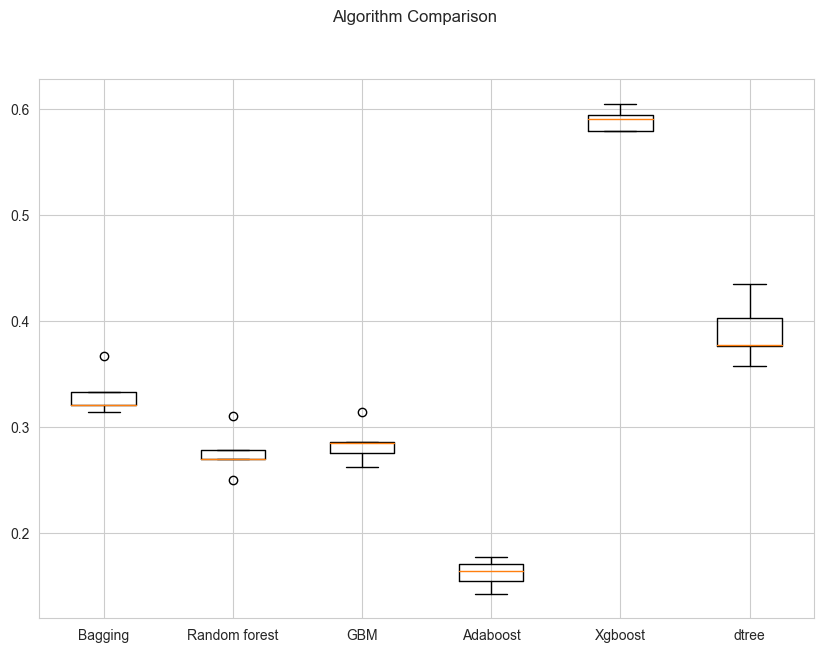

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_plain)
ax.set_xticklabels(names_plain)

plt.show()

## Comparing cross validation scores, Xgboost performs best, next is Decision Trees

### Model Building with Oversampled data


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_df, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 3760
Before OverSampling, counts of label '0': 40086 
After OverSampling, counts of label '1': 40086
After OverSampling, counts of label '0': 40086 

After OverSampling, the shape of train_X: (80172, 52)
After OverSampling, the shape of train_y: (80172,) 


## SMOTE with class weights

In [ ]:
models = []  # Empty list to store all the models

results=[]
results_smote=[]
names_smote=[]
# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=3, class_weight='balanced'), random_state=3)))
models.append(("Random forest", RandomForestClassifier(random_state=3, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=3)))
models.append(("Adaboost", AdaBoostClassifier(random_state=3)))

# use below for binary classification
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
models.append(("Xgboost", XGBClassifier(random_state=3, eval_metric="logloss",scale_pos_weight=scale_pos_weight)))

models.append(("dtree", DecisionTreeClassifier(random_state=3, class_weight='balanced')))
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset smote with class weights:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=3
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results_smote.append(cv_result)
    names_smote.append('smote_'+name)
    print("{}: {}".format(name, cv_result.mean()))

results=results_plain+results_smote
names=names_plain+names_smote
results, names

print("\nTraining and Validation and Difference with SMOTE:\n")

scores_train_over=[]
scores_val_over=[]
scores_diff_over=[]

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_train_over.append(scores_train)
    scores_val = recall_score(y_val, model.predict(X_val_df))
    scores_val_over.append(scores_val)
    scores_diff = scores_train - scores_val
    scores_diff_over.append(scores_diff)
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, scores_diff))


Cross-Validation performance on training dataset smote with class weights:
Bagging: 0.9349648273298513
Random forest: 0.9359626975017823
GBM: 0.88584541585723
Adaboost: 0.8575312475954922
Xgboost: 0.9688669154748579
dtree: 0.9390809838397471

Training and Validation and Difference with SMOTE:
Bagging: Training Score: 0.9890, Validation Score: 0.2931, Difference: 0.6959
Random forest: Training Score: 0.9996, Validation Score: 0.2759, Difference: 0.7237
GBM: Training Score: 0.8874, Validation Score: 0.2500, Difference: 0.6374
Adaboost: Training Score: 0.8562, Validation Score: 0.2457, Difference: 0.6105
Xgboost: Training Score: 0.9846, Validation Score: 0.7026, Difference: 0.2820
dtree: Training Score: 0.9995, Validation Score: 0.3491, Difference: 0.6504


- The cross validation scores improved significantly with SMOTE upsampling
- Xgboost followed by Decision Tree do well on cross validation scores on SMOTE

In [ ]:
print("\nTraining and Validation and Difference with SMOTE:\n")
mdl_names=[i[0] for i in models]
scores_train_over_df=pd.DataFrame(scores_train_over, index=mdl_names, columns=['train_over'])
scores_val_over_df=pd.DataFrame(scores_val_over, index=mdl_names, columns=['val_over'])
scores_diff_over_df=pd.DataFrame(scores_diff_over, index=mdl_names, columns=['diff_over'])
scores_over=pd.concat([scores_train_over_df,scores_val_over_df,scores_diff_over_df],axis=1)
scores_over.sort_values(by='val_over',ascending=False)


Training and Validation and Difference with SMOTE:


,train_over,val_over,diff_over
Xgboost,0.985,0.703,0.282
dtree,1.000,0.349,0.650
Bagging,0.989,0.293,0.696
Random forest,1.000,0.276,0.724
GBM,0.887,0.250,0.637
Adaboost,0.856,0.246,0.611


- Comparing validation scores using SMOTE, Xgboost followed by Decision Tree do well. Decision Tree scores 0.349 compared to Xgboost 0.7

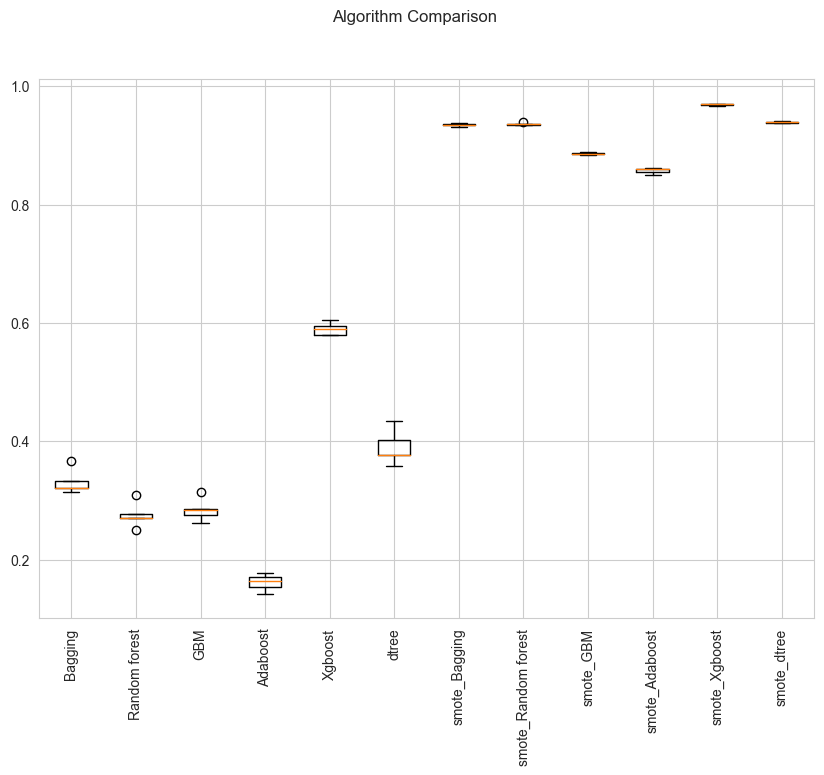

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1), names, rotation='vertical')

plt.show()

#### Comparing cross validation scores with SMOTE,
- Models trained on SMOTE upsampling show significant improvement compared to as is train data  
- Variance of the scores with SMOTE is very less compared to as is train data (By comparing the lengths of the boxes and the lengths of the whiskers of different boxplots, the relative variability (variance) between groups can be visually assessed)
- Xgboost followed by Decision Tree do well on cross validation scores on SMOTE


#### We'll be tuning Xgboost, Decision Tree with SMOTE for bettering the performance

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train_df, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3760
Before Under Sampling, counts of label 'No': 40086 

After Under Sampling, counts of label 'Yes': 3760
After Under Sampling, counts of label 'No': 3760 

After Under Sampling, the shape of train_X: (7520, 52)
After Under Sampling, the shape of train_y: (7520,) 


In [ ]:
print("\nCross validation Performance undersampling on training dataset:\n")

models_un = []  # Empty list to store all the models
results=[]
results_un=[]
names_un=[]

# Appending models into the list
models_un.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=4, class_weight='balanced'), random_state=4)))
models_un.append(("Random forest", RandomForestClassifier(random_state=4, class_weight='balanced')))
models_un.append(("GBM", GradientBoostingClassifier(random_state=4)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=4)))

# use below for binary classification
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
models_un.append(("Xgboost", XGBClassifier(random_state=4, eval_metric="logloss",scale_pos_weight=scale_pos_weight)))

models_un.append(("dtree", DecisionTreeClassifier(random_state=4, class_weight='balanced')))

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=3
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append('undersampling_'+name)
    print("{}: {}".format(name, cv_result.mean()))

results=results_plain+results_smote+results_un
names=names_plain+names_smote+names_un

print("\nTraining and Validation Performance Difference undersampling:\n")
scores_train_un = []
scores_val_un = []
scores_diff_un = []

for name, model_un in models_un:
    model_un.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model_un.predict(X_train_un))
    scores_train_un.append(scores_train)
    scores_val = recall_score(y_val, model_un.predict(X_val_df))
    scores_val_un.append(scores_val)
    scores_diff = scores_train - scores_val
    scores_diff_un.append(scores_diff)
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, scores_diff))



Cross validation Performance undersampling on training dataset:
Bagging: 0.6319148936170214
Random forest: 0.6659574468085107
GBM: 0.6106382978723405
Adaboost: 0.6702127659574467
Xgboost: 0.9228723404255319
dtree: 0.6585106382978723

Training and Validation Performance Difference undersampling:
Bagging: Training Score: 0.9652, Validation Score: 0.6207, Difference: 0.3445
Random forest: Training Score: 1.0000, Validation Score: 0.7026, Difference: 0.2974
GBM: Training Score: 0.6309, Validation Score: 0.6810, Difference: -0.0502
Adaboost: Training Score: 0.6686, Validation Score: 0.7284, Difference: -0.0598
Xgboost: Training Score: 1.0000, Validation Score: 0.9526, Difference: 0.0474
dtree: Training Score: 1.0000, Validation Score: 0.6552, Difference: 0.3448


#### cross validation scores decreased compared to SMOTE upsampling
- Xgboost followed by Adaboost followed by Randomforest do well on cross validation scores on undersampled data


In [ ]:
mdl_names = [i[0] for i in models_un]
scores_train_un_df = pd.DataFrame(scores_train_un, index=mdl_names, columns=['train_un'])
scores_val_un_df = pd.DataFrame(scores_val_un, index=mdl_names, columns=['val_un'])
scores_diff_un_df = pd.DataFrame(scores_diff_un, index=mdl_names, columns=['diff_un'])
scores_un = pd.concat([scores_train_un_df, scores_val_un_df, scores_diff_un_df],
                        axis=1)
scores_un.sort_values(by='val_un',ascending=False)


,train_un,val_un,diff_un
Xgboost,1.000,0.953,0.047
Adaboost,0.669,0.728,-0.060
Random forest,1.000,0.703,0.297
GBM,0.631,0.681,-0.050
dtree,1.000,0.655,0.345
Bagging,0.965,0.621,0.344


## Comparing validation scores using Undersampling,
- Scores with undersampled data improve compared to SMOTE, could be due to reduced dataset with undersampling
- Xgboost followed by Adaboost do well. Adaboost scores 0.72 compared to Xgboost 0.95
- For Adaboost and GBM, validation scores are better than training scores possibly due to smaller dataset
- Xgboost, Random forest and Decision Tree achieve 100% recall score on training, revealing overfitting due to small dataset size

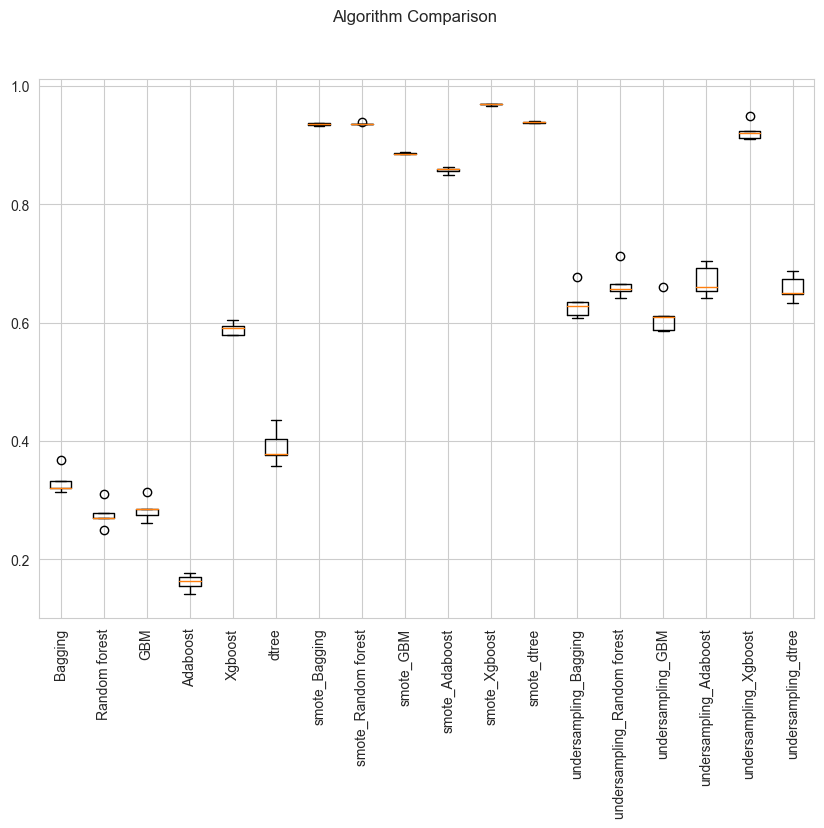

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1), names, rotation='vertical')

plt.show()

### Comparing cross validation scores with Undersampling,
- Models trained on SMOTE upsampling score best followed by undersampling followed by as is train data  
- Variance of the scores with SMOTE is very less compared to as is train data which is less compared to undersampled data (By comparing the lengths of the boxes and the lengths of the whiskers of different boxplots, the relative variability (variance) between groups can be visually assessed)
- Xgboost followed by Adaboost followed by Randomforest do well on cross validation scores on undersampled data


- We'll be tuning Xgboost, Adaboost, Randomforest with undersampled data for improving the performance

- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- Overall, We'll tune Xgboost, Decision Tree with SMOTE and Xgboost, Adaboost, Randomforest with undersampling

## Hyperparameter Tuning

## Tuning with SMOTE(oversampled data)

In [ ]:
%%time

# defining model
Model=XGBClassifier(random_state=1, eval_metric="aucpr",early_stopping_rounds=10,)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(150,300,50),
    'scale_pos_weight':[0,1,2,5,10],
    # 'scale_pos_weight':np.random.uniform(0,1.75,9),
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.7,0.8,0.9,1]
}
evaluation = [ ( X_val_df, y_val)]
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over, eval_set=evaluation,verbose=0)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 0} with CV score=1.0:
CPU times: total: 12.1 s
Wall time: 34 s


In [ ]:
tuned_smote_xgb = XGBClassifier(
    random_state=5,
    subsample=1,
    scale_pos_weight=5,
    n_estimators=200,
    learning_rate=0.01,
    gamma=0,
)

tuned_smote_xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [ ]:
# Checking model's performance on training set
train_smote_xgb = model_performance_classification_sklearn(tuned_smote_xgb, X_train_over, y_train_over)
train_smote_xgb

,Accuracy,Recall,Precision,F1
0,0.689,0.991,0.618,0.761


In [ ]:
# Checking model's performance on validation set
val_smote_xgb = model_performance_classification_sklearn(tuned_smote_xgb, X_val_df, y_val)
val_smote_xgb

,Accuracy,Recall,Precision,F1
0,0.426,0.931,0.122,0.215


- XGboost hyperparameter tuning with SMOTE gives training score of 0.99 and a validation score of 0.93

## Tuning Decision Tree with SMOTE

In [ ]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=5)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth': np.arange(2,21),
    'min_samples_leaf': [1, 4, 7, 9, 11, 13, 17, 15, 19, 21],
    'max_leaf_nodes' : [10, 15, 20, 30, 35, 40, 50, 55],
    'min_impurity_decrease': [0.0001,0.001,0.01]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 17, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 50, 'max_depth': 11} with CV score=0.7738597821858533:
CPU times: total: 6.02 s
Wall time: 21.9 s


In [ ]:
tuned_smote_dt = DecisionTreeClassifier(
    random_state=5,
    min_samples_leaf=17,
    min_impurity_decrease=0.0001,
    max_leaf_nodes=50,
    max_depth= 11,
)
tuned_smote_dt.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50,
                       min_impurity_decrease=0.0001, min_samples_leaf=17,
                       random_state=5)

In [ ]:
# Checking model's performance on training set
train_smote_dt = model_performance_classification_sklearn(tuned_smote_dt, X_train_over, y_train_over)
train_smote_dt

,Accuracy,Recall,Precision,F1
0,0.868,0.762,0.967,0.853


In [ ]:
# Checking model's performance on validation set
val_smote_dt = model_performance_classification_sklearn(tuned_smote_dt, X_val_df, y_val)
val_smote_dt

,Accuracy,Recall,Precision,F1
0,0.911,0.246,0.449,0.318


- As expected Decision is not performing well on validation and training.

## Tuning ada with smote data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=5)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
         DecisionTreeClassifier(max_depth=4, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=4, random_state=1)} with CV score=0.9211177152765888:
CPU times: total: 36 s
Wall time: 2min 2s


In [ ]:
tuned_smote_adb = AdaBoostClassifier(
    random_state=5,
    n_estimators=50,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=4, random_state=1),
)
tuned_smote_adb.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   learning_rate=1, random_state=5)

In [ ]:
# Checking model's performance on training set
train_smote_adb = model_performance_classification_sklearn(tuned_smote_adb, X_train_over, y_train_over)
train_smote_adb

,Accuracy,Recall,Precision,F1
0,0.966,0.938,0.995,0.965


In [ ]:
# Checking model's performance on validation set
val_smote_adb = model_performance_classification_sklearn(tuned_smote_adb, X_val_df, y_val)
val_smote_adb

,Accuracy,Recall,Precision,F1
0,0.933,0.345,0.714,0.465


- Adaboost is not performing well on validation. It shows significant improvement in training score

### Tuning Xgboost with undersampled Data

In [ ]:
%%time

Model=XGBClassifier(random_state=1, eval_metric="aucpr",early_stopping_rounds=10,)

param_grid = {
    'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
evaluation = [ ( X_val_df, y_val)]
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un, eval_set=evaluation,verbose=0)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 1} with CV score=1.0:
CPU times: total: 1.7 s
Wall time: 3.77 s


In [ ]:
tuned_un_xgb_1 = XGBClassifier(
    random_state=5,
    subsample=0.7,
    scale_pos_weight=2,
    n_estimators=50,
    learning_rate=0.01,
    gamma=1,
)
tuned_un_xgb_1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [ ]:
# Checking model's performance on training set
train_undersample_xgb_1 = model_performance_classification_sklearn(tuned_un_xgb_1, X_train_un, y_train_un)
train_undersample_xgb_1

,Accuracy,Recall,Precision,F1
0,0.548,0.994,0.525,0.687


In [ ]:
# Checking model's performance on validation set
val_undersample_xgb_1 = model_performance_classification_sklearn(tuned_un_xgb_1, X_val_df, y_val)
val_undersample_xgb_1

,Accuracy,Recall,Precision,F1
0,0.172,0.987,0.092,0.168


## More tuning XGB with undersampled data

In [ ]:
%%time

# defining model
Model=XGBClassifier(random_state=1, eval_metric="aucpr",early_stopping_rounds=10)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'n_estimators':np.arange(50,300,50),
    'scale_pos_weight':np.random.uniform(0,1.75,9),
    'learning_rate':[0.01,0.1,0.2,0.05],
    'gamma':[0,1,3,5],
    'subsample':[0.7,0.8,0.9,1]
}
evaluation = [ ( X_val_df, y_val)]
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un, eval_set=evaluation,verbose=0)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 1.7296674288054141, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 5} with CV score=1.0:
CPU times: total: 2.72 s
Wall time: 5 s


In [ ]:
tuned_un_xgb_2 = XGBClassifier(
    random_state=5,
    subsample=0.8,
    scale_pos_weight=1.4651605258687925,
    n_estimators=50,
    learning_rate=0.01,
    gamma=5,
)
tuned_un_xgb_2.fit(X_train_un, y_train_un, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [ ]:
# Checking model's performance on training set
train_undersample_xgb_2 = model_performance_classification_sklearn(tuned_un_xgb_2, X_train_un, y_train_un)
train_undersample_xgb_2

,Accuracy,Recall,Precision,F1
0,0.601,0.947,0.560,0.704


In [ ]:
# Checking model's performance on validation set
val_undersample_xgb_2 = model_performance_classification_sklearn(tuned_un_xgb_2, X_val_df, y_val)
val_undersample_xgb_2

,Accuracy,Recall,Precision,F1
0,0.299,0.953,0.104,0.187


- Tuning  Xgboost with undersampled Data gives less recall val scores, but they are around the same score

## Tuning Adaboost with undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=5)

# Parameter grid to pass in RandomSearchCV
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
         DecisionTreeClassifier(max_depth=4, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=4, random_state=1)} with CV score=0.6792553191489361:
CPU times: total: 4.42 s
Wall time: 8.01 s


In [ ]:
tuned_un_adb = AdaBoostClassifier(
    random_state=5,
    n_estimators=90,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=4, random_state=1),
)
tuned_un_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   learning_rate=1, n_estimators=90, random_state=5)

In [ ]:
# Checking model's performance on training set
train_undersample_adb = model_performance_classification_sklearn(tuned_un_adb, X_train_un, y_train_un)
train_undersample_adb

,Accuracy,Recall,Precision,F1
0,0.866,0.847,0.881,0.863


In [ ]:
# Checking model's performance on validation set
val_undersample_adb = model_performance_classification_sklearn(tuned_un_adb, X_val_df, y_val)
val_undersample_adb

,Accuracy,Recall,Precision,F1
0,0.706,0.690,0.179,0.284


- Adaboost is not performing well on validation. It shows significant improvement in training score

## Tuning RandomForest with undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=5)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 1, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.6696808510638298:
CPU times: total: 1.05 s
Wall time: 7 s


In [ ]:
tuned_un_rf = RandomForestClassifier(
    random_state=5,
    n_estimators=200,
    min_samples_leaf=1,
    max_samples=0.4,
    max_features='sqrt'
)
tuned_un_rf.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.4, n_estimators=200, random_state=5)

In [ ]:
# Checking model's performance on training set
train_undersample_rf = model_performance_classification_sklearn(tuned_un_rf, X_train_un, y_train_un)
train_undersample_rf

,Accuracy,Recall,Precision,F1
0,0.958,0.942,0.973,0.957


In [ ]:
# Checking model's performance on validation set
val_undersample_rf = model_performance_classification_sklearn(tuned_un_rf, X_val_df, y_val)
val_undersample_rf

,Accuracy,Recall,Precision,F1
0,0.758,0.733,0.220,0.339


- RandomForest is not performing well on validation. It shows significant improvement in training score

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        train_smote_adb,
        train_smote_dt,
        train_smote_xgb,
        train_undersample_xgb_1,
        train_undersample_xgb_2,
        train_undersample_adb,
        train_undersample_rf
    ],
    axis=0,
)
models_train_comp_df.index = [
    "Adaboost with SMOTE data",
    "Decision Tree with SMOTE data",
    "XGB with SMOTE data",
    "XGB with Undersampled data 1",
    "XGB with Undersampled data 2",
    "Adaboost with Undersampled data",
    "RandomForest with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df.sort_values(by='Recall',ascending=False)

Training performance comparison:


,Accuracy,Recall,Precision,F1
XGB with Undersampled data 1,0.548,0.994,0.525,0.687
XGB with SMOTE data,0.689,0.991,0.618,0.761
XGB with Undersampled data 2,0.601,0.947,0.560,0.704
RandomForest with Undersampled data,0.958,0.942,0.973,0.957
Adaboost with SMOTE data,0.966,0.938,0.995,0.965
Adaboost with Undersampled data,0.866,0.847,0.881,0.863
Decision Tree with SMOTE data,0.868,0.762,0.967,0.853


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        val_smote_adb,
        val_smote_dt,
        val_smote_xgb,
        val_undersample_xgb_1,
        val_undersample_xgb_2,
        val_undersample_adb,
        val_undersample_rf
    ],
    axis=0,
)
models_val_comp_df.index = [
    "Adaboost with SMOTE data",
    "Decision Tree with SMOTE data",
    "XGB with SMOTE data",
    "XGB with Undersampled data 1",
    "XGB with Undersampled data 2",
    "Adaboost with Undersampled data",
    "RandomForest with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df.sort_values(by='Recall',ascending=False)

Validation performance comparison:


,Accuracy,Recall,Precision,F1
XGB with Undersampled data 1,0.172,0.987,0.092,0.168
XGB with Undersampled data 2,0.299,0.953,0.104,0.187
XGB with SMOTE data,0.426,0.931,0.122,0.215
RandomForest with Undersampled data,0.758,0.733,0.220,0.339
Adaboost with Undersampled data,0.706,0.690,0.179,0.284
Adaboost with SMOTE data,0.933,0.345,0.714,0.465
Decision Tree with SMOTE data,0.911,0.246,0.449,0.318


- XGB performs well, We could evaluate the performance of XGB models with undersampled and SMOTE data on test data

In [ ]:
# Let's check the performance on test set
test_smote_xgb = model_performance_classification_sklearn(tuned_smote_xgb, X_test_df, y_test)
test_smote_xgb

,Accuracy,Recall,Precision,F1
0,0.422,0.880,0.113,0.200


In [ ]:
# Let's check the performance on test set
test_undersample_xgb_1= model_performance_classification_sklearn(tuned_un_xgb_1, X_test_df, y_test)
test_undersample_xgb_1

,Accuracy,Recall,Precision,F1
0,0.170,0.984,0.089,0.163


In [ ]:
# Let's check the performance on test set
test_undersample_xgb_2 = model_performance_classification_sklearn(tuned_un_xgb_2, X_test_df, y_test)
test_undersample_xgb_2

,Accuracy,Recall,Precision,F1
0,0.294,0.925,0.098,0.177


- All the models perform well, tuned_un_xgb_1 tops the score
- XGB with undersampled data with version 1 params performs well
- The training, validation and test scores for the model are close, increasing the confidence in generalizing the prediction

### Feature Importance

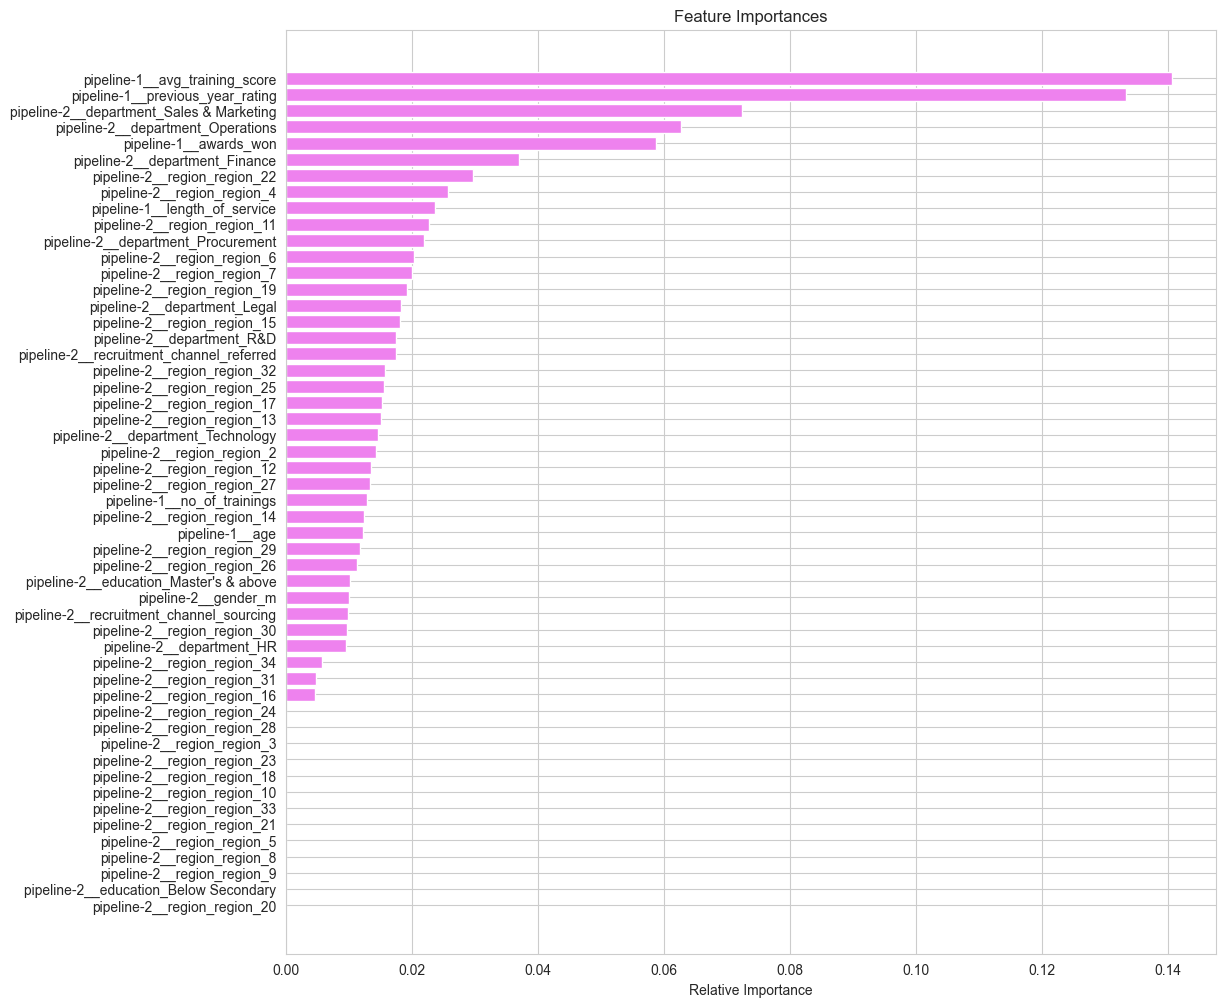

In [ ]:
feature_names = X_train_df.columns
importances = tuned_un_xgb_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important features for making predictions with the model, are
avg_training_score, previous_year_rating, department_Sales & Marketing, department_Operations, awards_won, department_Finance, region_22, region_4, length_of_service, region_11, department_Procurement

- Of the different recruitment channels, referred channel has more importance, of the education levels Master's and above, of the departments, Sales and marketing,  of the regions, region_22 have highest importance in the respective category

- The least important features are region_region_20, education Below Secondary, department_HR

# Conclusions

**The profile of the employee for whom promotion can be awarded:**
**Primary information to look at:**
- `Average training score` - should have 85 or 60.
- `Previous year rating` - Should have atleast 3. Around 44% of the promoted employees have 5 as previous year rating
- `Department` - Technology followed by Procurement, then Analytics
- `Length of service` - Around 2.6 years. The peak is 2.6 years for the promoted employees
- `Region` - Region 4 followed by region 17, then 25
- `Education` - Must be Master's and above
- `recruitment channel` - Preferred referred channel

**Secondary information to look at:**
- `Age` - Median age for employees who are promoted are 32.5
- `Number of trainings` - should have attended atleast 1 training. The highest number of promoted employees have completed one training. Atmost 6 trainings are completed by promoted employees

**Other regions and departments in the order of high proportion of promotions:**
- Employee belonging to the regions and departments has more likelihood of getting promoted in the following order-
-- Regions-4>17>25>28>23>22>3>7>1
-- Deparments-Technology>Procurement>Analytics>Operations>Finance>Sales & Marketing>R&D>HR>Legal

**The profile of the employee for whom promotion cannot be awarded:**
**Primary information to look at:**
- `Average training score` - 50 or 60 is the average score
- `Previous year rating` - Has rating of 3, in some cases 4 or 5
- `Department` - Belongs to Legal or HR
- `Length of service` - 2.5 years
- `Region` - Belongs to regions 9
- `Education` - Has Bachelors
- `recruitment channel`- is from other recruitment channel

**Secondary information to look at:**
- `Age` - Peak age for employees who are not promoted is around 32
- `Number of trainings` - 1 training completed. Around 40k employees with 1 training completed are not promoted

**Insights**
* Employee training score plays a key role in promotion. An employee who has already fulfilled the necessary training for next role level is already equiped with knowledge to take the responsibilities of the role. Company doesn't have to spend on training and employee getting promoted is a win-win for both the parties.
* An employee with uptodate training if denied of promotion, there is a higher probability of employee looking for position else where. This would cost the company.
* Employee who has kept up good rating in past year is more likely to keep the pace when promoted. Boosts their moral and engagement with companies vision.
* An employee who has won accolades has performed better than the rest; this should give them a priority. This also helps in setting greater standards for promotions.
* Region has an important role in success of the company and employee. Employee responsible to certain higher demand region should be prioritized as a good gesture for the challenges they undertake.

**Additional information:**
- Besides these it would be helpful to monitor the technical and business acumen of the employee
- Softskills such as loyalty, patience, obedience, leadership could also be monitored for selecting the right employee
- Instead of yearly promotional cycle, it would be good to have quarterly-cycle, so the deserving employees are rewarded well, and the company retains the right candidate